In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import csv
from datetime import datetime
import os

In [2]:
#importing general player info
data=pd.read_csv('mlb-player-digital-engagement-forecasting/players.csv')
data

playerId          playerName         DOB mlbDebutDate  \
0       665482  Gilberto Celestino  1999-02-13   2021-06-02   
1       593590       Webster Rivas  1990-08-08   2021-05-28   
2       661269  Vladimir Gutierrez  1995-09-18   2021-05-28   
3       669212          Eli Morgan  1996-05-13   2021-05-28   
4       666201         Alek Manoah  1998-01-09   2021-05-27   
...        ...                 ...         ...          ...   
2056    672695     Geraldo Perdomo  1999-10-22          NaN   
2057    672911          Jesus Cruz  1995-04-15          NaN   
2058    676103         Damon Jones  1994-09-30          NaN   
2059    676755       Isaac Mattson  1995-07-14          NaN   
2060    680430       Nick Allgeyer  1996-02-03          NaN   

                birthCity birthStateProvince        birthCountry  \
0           Santo Domingo                NaN  Dominican Republic   
1                   Nagua                NaN  Dominican Republic   
2                  Havana                NaN                Cuba   
3     Rancho Palos Verdes                 CA                 USA   
4               Homestead                 FL                 USA   
...                   ...                ...                 ...   
2056        Santo Domingo                NaN  Dominican Republic   
2057   Salinas de Hidalgo    San Luis Potosi              Mexico   
2058           Twin Falls                 ID                 USA   
2059                 Erie                 PA                 USA   
2060            St. Louis                 MO                 USA   

      heightInches  weight primaryPositionCode primaryPositionName  \
0               72     170                   8          Outfielder   
1               73     219                   3          First Base   
2               73     190                   1             Pitcher   
3               70     190                   1             Pitcher   
4               78     260                   1             Pitcher   
...            ...     ...                 ...                 ...   
2056            74     203                   6           Shortstop   
2057            73     230                   1             Pitcher   
2058            77     233                   1             Pitcher   
2059            74     205                   1             Pitcher   
2060            75     210                   1             Pitcher   

     playerForTestSetAndFuturePreds  
0                             False  
1                              True  
2                              True  
3                              True  
4                              True  
...                             ...  
2056                           True  
2057                          False  
2058                           True  
2059                           True  
2060                           True  

[2061 rows x 12 columns]

In [10]:
data.columns

Index(['playerId', 'playerName', 'DOB', 'mlbDebutDate', 'birthCity',
       'birthStateProvince', 'birthCountry', 'heightInches', 'weight',
       'primaryPositionCode', 'primaryPositionName',
       'playerForTestSetAndFuturePreds'],
      dtype='object')

In [3]:
#importing list of players we are to predict for
Player_predictions= data[data.playerForTestSetAndFuturePreds==True]
Player_predictions

playerId          playerName         DOB mlbDebutDate  \
1       593590       Webster Rivas  1990-08-08   2021-05-28   
2       661269  Vladimir Gutierrez  1995-09-18   2021-05-28   
3       669212          Eli Morgan  1996-05-13   2021-05-28   
4       666201         Alek Manoah  1998-01-09   2021-05-27   
5       680911         Owen Miller  1996-11-15   2021-05-23   
...        ...                 ...         ...          ...   
2055    667674         Jack Kruger  1994-10-26          NaN   
2056    672695     Geraldo Perdomo  1999-10-22          NaN   
2058    676103         Damon Jones  1994-09-30          NaN   
2059    676755       Isaac Mattson  1995-07-14          NaN   
2060    680430       Nick Allgeyer  1996-02-03          NaN   

                birthCity birthStateProvince        birthCountry  \
1                   Nagua                NaN  Dominican Republic   
2                  Havana                NaN                Cuba   
3     Rancho Palos Verdes                 CA                 USA   
4               Homestead                 FL                 USA   
5                  Mequon                 WI                 USA   
...                   ...                ...                 ...   
2055          Los Angeles                 CA                 USA   
2056        Santo Domingo                NaN  Dominican Republic   
2058           Twin Falls                 ID                 USA   
2059                 Erie                 PA                 USA   
2060            St. Louis                 MO                 USA   

      heightInches  weight primaryPositionCode primaryPositionName  \
1               73     219                   3          First Base   
2               73     190                   1             Pitcher   
3               70     190                   1             Pitcher   
4               78     260                   1             Pitcher   
5               72     185                   4         Second Base   
...            ...     ...                 ...                 ...   
2055            73     195                   2             Catcher   
2056            74     203                   6           Shortstop   
2058            77     233                   1             Pitcher   
2059            74     205                   1             Pitcher   
2060            75     210                   1             Pitcher   

     playerForTestSetAndFuturePreds  
1                              True  
2                              True  
3                              True  
4                              True  
5                              True  
...                             ...  
2055                           True  
2056                           True  
2058                           True  
2059                           True  
2060                           True  

[1187 rows x 12 columns]

In [4]:
#creating a dictionary for player Id: playername
a=list(data.playerId)

In [5]:
#creating a dictionary for player Id: playername
b=list(data.playerName)

In [6]:
#dictionary created
dictionary = dict(zip(a,b))

In [7]:
#very important data for prelim EDA
data1=pd.read_csv('mlb-player-digital-engagement-forecasting/train.csv')

In [8]:
data1

date                            nextDayPlayerEngagement  \
0     20180101  [{"engagementMetricsDate":"2018-01-02","player...   
1     20180102  [{"engagementMetricsDate":"2018-01-03","player...   
2     20180103  [{"engagementMetricsDate":"2018-01-04","player...   
3     20180104  [{"engagementMetricsDate":"2018-01-05","player...   
4     20180105  [{"engagementMetricsDate":"2018-01-06","player...   
...        ...                                                ...   
1211  20210426  [{"engagementMetricsDate":"2021-04-27","player...   
1212  20210427  [{"engagementMetricsDate":"2021-04-28","player...   
1213  20210428  [{"engagementMetricsDate":"2021-04-29","player...   
1214  20210429  [{"engagementMetricsDate":"2021-04-30","player...   
1215  20210430  [{"engagementMetricsDate":"2021-05-01","player...   

                                                  games  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1211  [{"gamePk":634374,"gameType":"R","season":2021...   
1212  [{"gamePk":634318,"gameType":"R","season":2021...   
1213  [{"gamePk":634309,"gameType":"R","season":2021...   
1214  [{"gamePk":634330,"gameType":"R","season":2021...   
1215  [{"gamePk":634287,"gameType":"R","season":2021...   

                                                rosters  \
0     [{"playerId":400121,"gameDate":"2018-01-01","t...   
1     [{"playerId":134181,"gameDate":"2018-01-02","t...   
2     [{"playerId":425492,"gameDate":"2018-01-03","t...   
3     [{"playerId":282332,"gameDate":"2018-01-04","t...   
4     [{"playerId":282332,"gameDate":"2018-01-05","t...   
...                                                 ...   
1211  [{"playerId":405395,"gameDate":"2021-04-26","t...   
1212  [{"playerId":443558,"gameDate":"2021-04-27","t...   
1213  [{"playerId":429722,"gameDate":"2021-04-28","t...   
1214  [{"playerId":405395,"gameDate":"2021-04-29","t...   
1215  [{"playerId":405395,"gameDate":"2021-04-30","t...   

                                        playerBoxScores  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1211  [{"home":1,"gamePk":634377,"gameDate":"2021-04...   
1212  [{"home":1,"gamePk":634320,"gameDate":"2021-04...   
1213  [{"home":1,"gamePk":634310,"gameDate":"2021-04...   
1214  [{"home":1,"gamePk":634330,"gameDate":"2021-04...   
1215  [{"home":1,"gamePk":634305,"gameDate":"2021-04...   

                                          teamBoxScores  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1211  [{"home":1,"teamId":139,"gamePk":634343,"gameD...   
1212  [{"home":1,"teamId":117,"gamePk":634333,"gameD...   
1213  [{"home":0,"teamId":111,"gamePk":634310,"gameD...   
1214  [{"home":0,"teamId":119,"gamePk":634346,"gameD...   
1215  [{"home":1,"teamId":135,"gamePk":634303,"gameD...   

                                           transactions  \
0     [{"transactionId":340732,"playerId":547348,"pl...   
1     [{"transactionId":339458,"playerId":621173,"pl...   
2     [{"transactionId":347527,"playerId":572389,"pl...   
3     [{"transactionId":339549,"playerId":545343,"pl...   
4     [{"transactionId":341195,"playerId":628336,"

In [9]:
import json
data1.shape

(1216, 12)

In [12]:
data1.columns

Index(['date', 'nextDayPlayerEngagement', 'games', 'rosters',
       'playerBoxScores', 'teamBoxScores', 'transactions', 'standings',
       'awards', 'events', 'playerTwitterFollowers', 'teamTwitterFollowers'],
      dtype='object')

In [13]:
#realized how many pages are in the entire json
countries=json.loads(data1.nextDayPlayerEngagement[0])
len(countries)

2061

In [59]:
import json
with open('countries.json', 'w') as f:
    json.dump(countries, f)

In [60]:
#this is one page or date in json, we must create a loop to look over all 2061 jsons and write to a csv file
df=pd.read_json('countries.json')
df

engagementMetricsDate  playerId   target1    target2    target3  \
0               2018-01-02    628317  0.011167   4.474708   0.005168   
1               2018-01-02    547989  0.042993   5.593385   0.045033   
2               2018-01-02    519317  0.974327  56.177043  13.693746   
3               2018-01-02    607625  0.006700   2.675097   0.005168   
4               2018-01-02    592547  0.001117   0.632296   0.002953   
...                    ...       ...       ...        ...        ...   
2056            2018-01-02    605525  0.000000   0.000000   0.000000   
2057            2018-01-02    573131  0.000000   0.048638   0.000000   
2058            2018-01-02    664199  0.000000   0.000000   0.000000   
2059            2018-01-02    663399  0.000000   0.000000   0.000000   
2060            2018-01-02    656775  0.000558   0.000000   0.000000   

        target4  
0      5.735294  
1      2.794118  
2     64.166667  
3      1.862745  
4      0.931373  
...         ...  
2056   0.098039  
2057   1.176471  
2058   0.196078  
2059   0.098039  
2060   0.000000  

[2061 rows x 6 columns]

In [494]:
## WRITING THE CSV FILE that is my target variables for TRAINING DATA
# import time

# for i in range(2061):
#     try:
#         countries=json.loads(data1.nextDayPlayerEngagement[i])
#     except:
#         'ValueError as err:'
#     data_file = open('target_file1.csv', 'a')
# # create the csv writer object
#     csv_writer = csv.writer(data_file)

# # Counter variable used for writing
# # headers to the CSV file
#     count = 0
 
#     for emp in countries:
#         if count == 0:
 
#         # Writing headers of CSV file
#             header = emp.keys()
#             csv_writer.writerow(header)
#             count += 1
 
#     # Writing data of CSV file
#         csv_writer.writerow(emp.values())
 
#     data_file.close()
#     time.sleep(3)
 

In [29]:
#wrote the csvfile and now looking into contents
from datetime import datetime
df1=pd.read_csv('target_file1.csv')
df1

engagementMetricsDate playerId                 target1  \
0                  2018-01-02   628317    0.011167070542384616   
1                  2018-01-02   547989     0.04299322158818077   
2                  2018-01-02   519317      0.9743269048230578   
3                  2018-01-02   607625   0.0067002423254307695   
4                  2018-01-02   592547   0.0011167070542384616   
...                       ...      ...                     ...   
4249776            2021-05-01   451661                       0   
4249777            2021-05-01   519301  0.00013148828965292353   
4249778            2021-05-01   527055                       0   
4249779            2021-05-01   543484  0.00013148828965292353   
4249780            2021-05-01   605525  0.00013148828965292353   

                       target2               target3              target4  
0            4.474708171206226  0.005167729742499409    5.735294117647059  
1            5.593385214007783   0.04503307347035199    2.794117647058824  
2            56.17704280155642    13.693745570517363    64.16666666666667  
3           2.6750972762645913  0.005167729742499409   1.8627450980392157  
4            0.632295719844358  0.002952988424285377   0.9313725490196079  
...                        ...                   ...                  ...  
4249776   0.013314249575608294                     0   0.6259246614316604  
4249777  0.0033285623939020735                     0  0.21622851940366453  
4249778   0.019971374363412443                     0  0.27313076135199726  
4249779   0.056585560696335246                     0   1.0242403550699897  
4249780    0.49928435908531105                     0   0.3869352452486628  

[4249781 rows x 6 columns]

In [16]:
#need to convert datatypes 
df1.playerId=[str(ele) for ele in df1.playerId]

In [36]:
# df1.replace(to_replace=dictionary,inplace=True, method=None)

In [40]:
#convert data into datetime format
from datetime import datetime
from dateutil import parser
from dateutil.parser import parse
playerdf=df1[df1.playerId=='628317']
date = playerdf.engagementMetricsDate
date1 = [parser.parse(x) for x in date]
date1

[datetime.datetime(2018, 1, 2, 0, 0),
 datetime.datetime(2018, 1, 3, 0, 0),
 datetime.datetime(2018, 1, 4, 0, 0),
 datetime.datetime(2018, 1, 5, 0, 0),
 datetime.datetime(2018, 1, 6, 0, 0),
 datetime.datetime(2018, 1, 7, 0, 0),
 datetime.datetime(2018, 1, 8, 0, 0),
 datetime.datetime(2018, 1, 9, 0, 0),
 datetime.datetime(2018, 1, 10, 0, 0),
 datetime.datetime(2018, 1, 11, 0, 0),
 datetime.datetime(2018, 1, 12, 0, 0),
 datetime.datetime(2018, 1, 13, 0, 0),
 datetime.datetime(2018, 1, 14, 0, 0),
 datetime.datetime(2018, 1, 15, 0, 0),
 datetime.datetime(2018, 1, 16, 0, 0),
 datetime.datetime(2018, 1, 17, 0, 0),
 datetime.datetime(2018, 1, 18, 0, 0),
 datetime.datetime(2018, 1, 19, 0, 0),
 datetime.datetime(2018, 1, 20, 0, 0),
 datetime.datetime(2018, 1, 21, 0, 0),
 datetime.datetime(2018, 1, 22, 0, 0),
 datetime.datetime(2018, 1, 23, 0, 0),
 datetime.datetime(2018, 1, 24, 0, 0),
 datetime.datetime(2018, 1, 25, 0, 0),
 datetime.datetime(2018, 1, 26, 0, 0),
 datetime.datetime(2018, 1, 27, 0

In [39]:
#convert data into datetime format
from datetime import datetime
from dateutil import parser
from dateutil.parser import parse
import string
df1.date= [str(x) for x in df1['engagementMetricsDate']]
date=df1.date
df1['date']= [parser.parse(x) for x in date]  # datetime.datetime(1999, 8, 28, 0, 0)


ParserError: Unknown string format: engagementMetricsDate

In [44]:
#the fan engagement scores for player (target1) in float dtype
j=[float(x) for x in playerdf.target1]
list(j)

[0.011167070542384616,
 0.0063558493370360234,
 0.0035564407141332956,
 0.003363413461053354,
 0.023975887107822988,
 0.032153533120651105,
 0.009795744728489944,
 0.0073203339613409305,
 0.005797456205049584,
 0.022302814033318463,
 0.010189164045541134,
 0.007204610951008646,
 0.011465744579418385,
 0.008577843933698313,
 0.005837257267385297,
 0.005009706305967813,
 0.007722454968434465,
 0.010044236491548193,
 0.010136136104916805,
 0.0033172604167900767,
 0.009451349180095459,
 0.007081609649873417,
 0.014643822303872626,
 0.008475947572411562,
 0.005156124414249102,
 0.009252446390885018,
 0.01226981319209415,
 0.005061194441888285,
 0.0022829095682447282,
 0.014359087645661898,
 0.07606468341629952,
 0.18782174165894847,
 0.1874780825982574,
 0.2106108933310608,
 0.08195270013911723,
 0.023218931721828907,
 0.025403435710567412,
 0.019755577911440305,
 0.14312316286800353,
 0.03780932088099251,
 0.008994353716916674,
 0.03636290175956042,
 0.018269178069678645,
 0.00948640598023

In [45]:
#the fan engagement scores for player (target2,3,4) in float dtype
g=[float(x) for x in playerdf.target2]
h=[float(x) for x in playerdf.target3]
m=[float(x) for x in playerdf.target4]


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

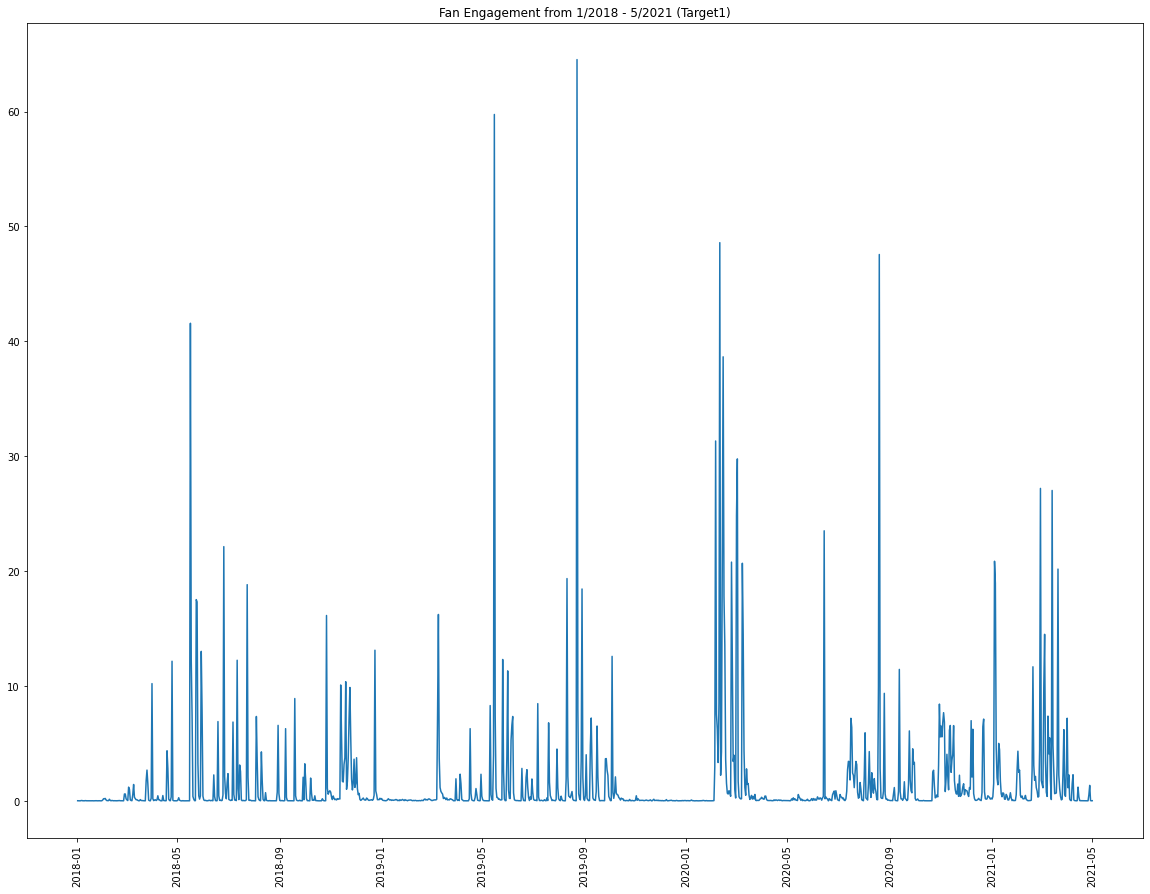

In [49]:
plt.figure(figsize= (20,15))
sns.lineplot( x= date1, y =j) 
plt.xticks(rotation=90)
# plt.set.ylim=(0, 2)
# plt.yticks(np.arange(0, .2, step=0.01)) 
plt.title("Fan Engagement from 1/2018 - 5/2021 (Target1)")
plt.show()



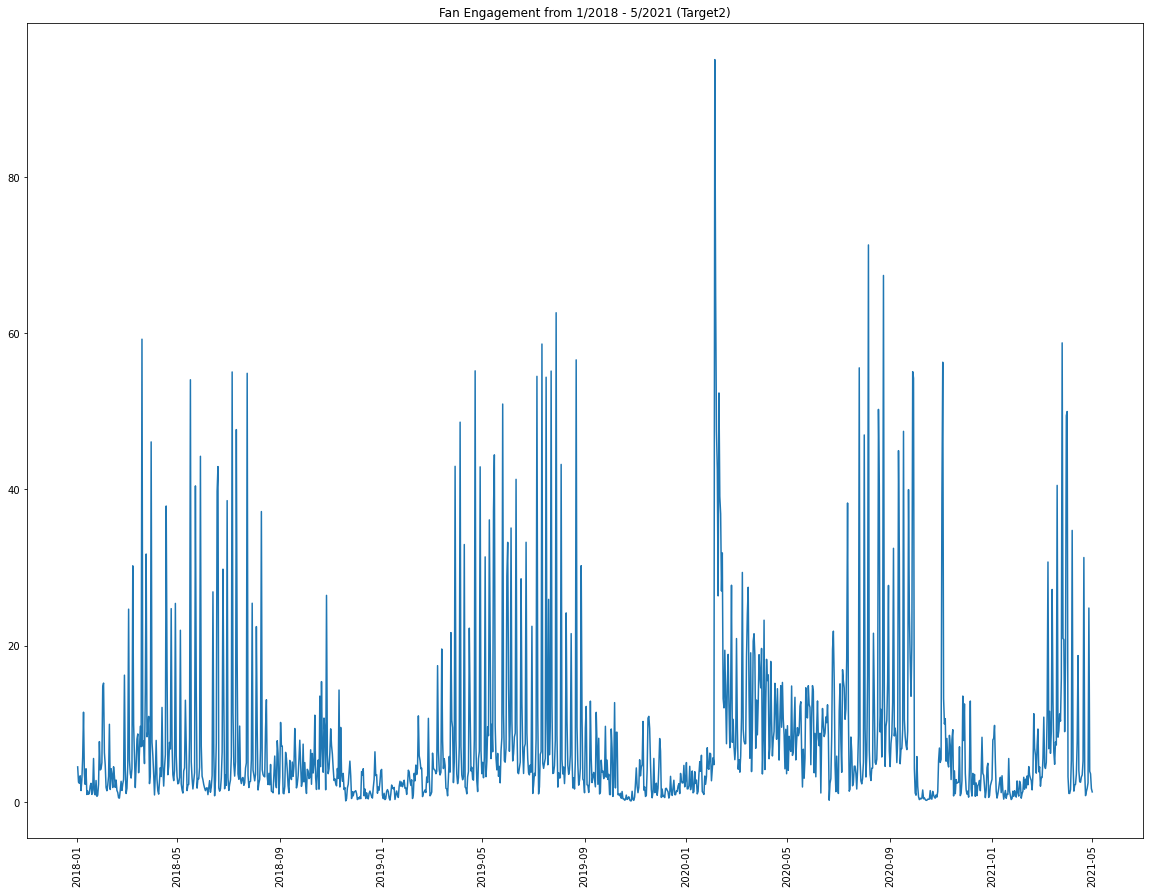

In [50]:
plt.figure(figsize= (20,15))
sns.lineplot( x= date1, y =g) 
plt.xticks(rotation=90)
# plt.set.ylim=(0, 2)
# plt.yticks(np.arange(0, .2, step=0.01)) 
plt.title("Fan Engagement from 1/2018 - 5/2021 (Target2)")
plt.show()

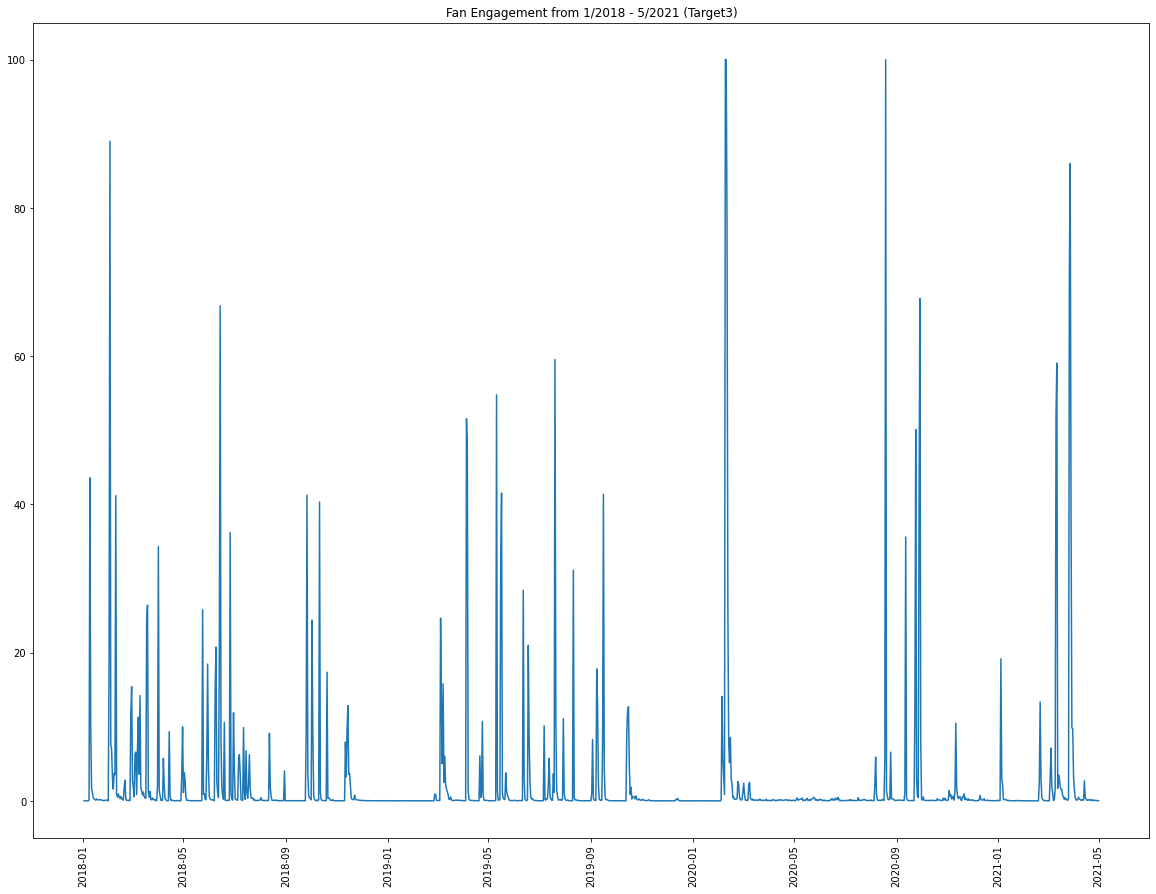

In [51]:
plt.figure(figsize= (20,15))
sns.lineplot( x= date1, y =h) 
plt.xticks(rotation=90)
# plt.set.ylim=(0, 2)
# plt.yticks(np.arange(0, .2, step=0.01)) 
plt.title("Fan Engagement from 1/2018 - 5/2021 (Target3)")
plt.show()

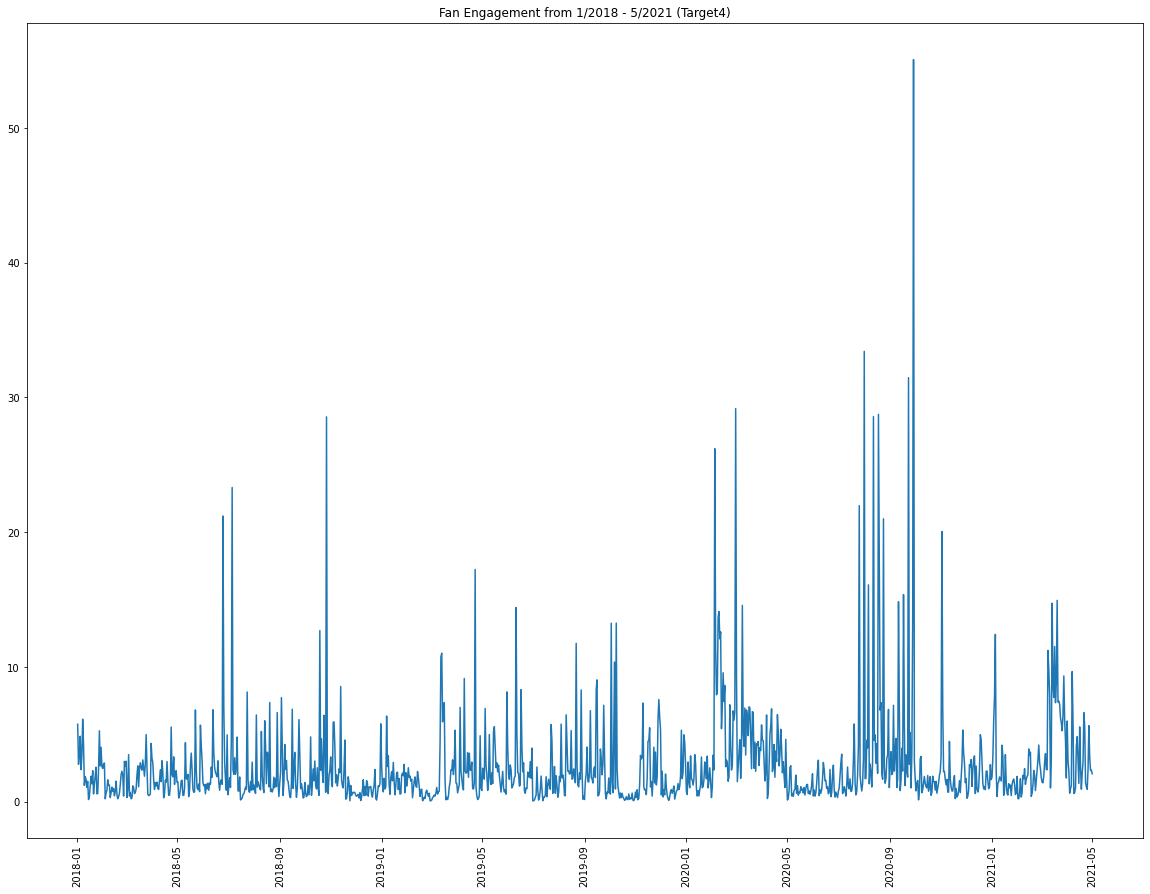

In [52]:
plt.figure(figsize= (20,15))
sns.lineplot( x= date1, y =m) 
plt.xticks(rotation=90)
# plt.set.ylim=(0, 2)
# plt.yticks(np.arange(0, .2, step=0.01)) 
plt.title("Fan Engagement from 1/2018 - 5/2021 (Target4)")
plt.show()

In [695]:
playerA=df1[df1.playerId=='607625']
date = playerdf.engagementMetricsDate

In [697]:
playerA['date']= [parser.parse(x) for x in playerdf.engagementMetricsDate] 

<ipython-input-697-2f7c947b05db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerA['date']= [parser.parse(x) for x in playerdf.engagementMetricsDate]


In [698]:
j=[float(x) for x in playerA.target1]

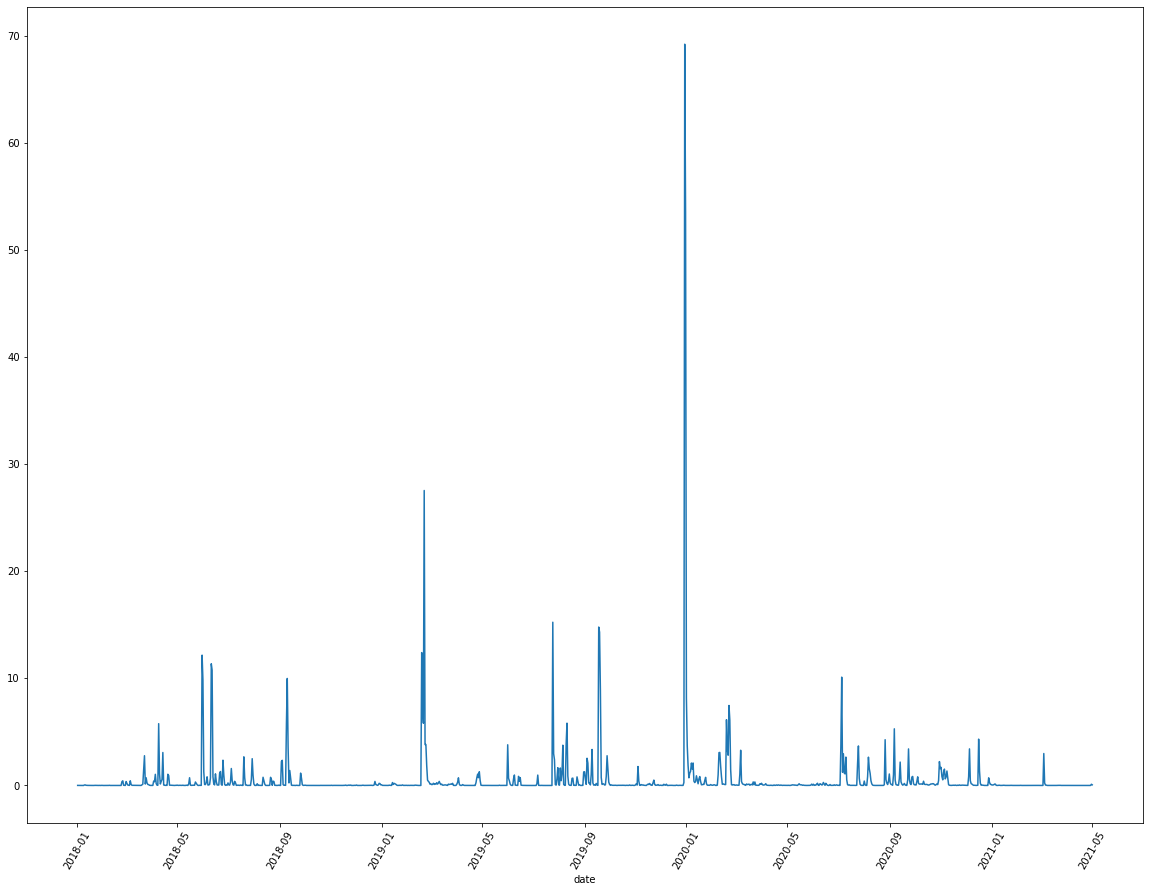

In [700]:
plt.figure(figsize= (20,15))
sns.lineplot( x= playerA.date, y =j) 
plt.xticks(rotation=60)
# plt.set.ylim=(0, 2)
# plt.yticks(np.arange(0, .2, step=0.01)) 
plt.show()

In [186]:
season

51      [{"gamePk":533782,"gameType":"E","season":2018...
52      [{"gamePk":534461,"gameType":"E","season":2018...
53      [{"gamePk":533785,"gameType":"S","season":2018...
54      [{"gamePk":533801,"gameType":"S","season":2018...
55      [{"gamePk":533823,"gameType":"S","season":2018...
                              ...                        
1211    [{"gamePk":634374,"gameType":"R","season":2021...
1212    [{"gamePk":634318,"gameType":"R","season":2021...
1213    [{"gamePk":634309,"gameType":"R","season":2021...
1214    [{"gamePk":634330,"gameType":"R","season":2021...
1215    [{"gamePk":634287,"gameType":"R","season":2021...
Name: games, Length: 639, dtype: object

In [187]:
season=data1.games.dropna()
season.loc[51]

'[{"gamePk":533782,"gameType":"E","season":2018,"gameDate":"2018-02-21","gameTimeUTC":"2018-02-21T20:10:00Z","resumeDate":null,"resumedFrom":null,"codedGameState":"F","detailedGameState":"Final","isTie":false,"gameNumber":1,"doubleHeader":"N","dayNight":"day","scheduledInnings":7,"gamesInSeries":0,"seriesDescription":"Exhibition","homeId":109,"homeName":"Arizona Diamondbacks","homeAbbrev":"ARI","homeWins":1,"homeLosses":0,"homeWinPct":1,"homeWinner":true,"homeScore":7,"awayId":5035,"awayName":"Arizona State Sun Devils","awayAbbrev":"ASU","awayWins":0,"awayLosses":1,"awayWinPct":0,"awayWinner":false,"awayScore":2}]'

In [212]:
for i in range(51,639,1):
    try:
        print(season.loc[i])
        list_ele=season.loc[i].split(',')
        list_create=[x.split(':') for x in list_ele]
    except:
        'KeyError: 86'

#     df5=pd.DataFrame(season.loc[i])
   
        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [209]:
list_ele=season.loc[51].split(',')
list_create=[x.split(':') for x in list_ele]

In [210]:
list_create

[['[{"gamePk"', '533782'],
 ['"gameType"', '"E"'],
 ['"season"', '2018'],
 ['"gameDate"', '"2018-02-21"'],
 ['"gameTimeUTC"', '"2018-02-21T20', '10', '00Z"'],
 ['"resumeDate"', 'null'],
 ['"resumedFrom"', 'null'],
 ['"codedGameState"', '"F"'],
 ['"detailedGameState"', '"Final"'],
 ['"isTie"', 'false'],
 ['"gameNumber"', '1'],
 ['"doubleHeader"', '"N"'],
 ['"dayNight"', '"day"'],
 ['"scheduledInnings"', '7'],
 ['"gamesInSeries"', '0'],
 ['"seriesDescription"', '"Exhibition"'],
 ['"homeId"', '109'],
 ['"homeName"', '"Arizona Diamondbacks"'],
 ['"homeAbbrev"', '"ARI"'],
 ['"homeWins"', '1'],
 ['"homeLosses"', '0'],
 ['"homeWinPct"', '1'],
 ['"homeWinner"', 'true'],
 ['"homeScore"', '7'],
 ['"awayId"', '5035'],
 ['"awayName"', '"Arizona State Sun Devils"'],
 ['"awayAbbrev"', '"ASU"'],
 ['"awayWins"', '0'],
 ['"awayLosses"', '1'],
 ['"awayWinPct"', '0'],
 ['"awayWinner"', 'false'],
 ['"awayScore"', '2}]']]

In [146]:

ordered_list=[]
for i in range(len(rowdata)):
    for ele in rowdata[i]:
        print(ele.split(':'))
        ordered_list.append(ele.split(':')) 


['[{"gamePk"', '533782']
['"gameType"', '"E"']
['"season"', '2018']
['"gameDate"', '"2018-02-21"']
['"gameTimeUTC"', '"2018-02-21T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '7']
['"gamesInSeries"', '0']
['"seriesDescription"', '"Exhibition"']
['"homeId"', '109']
['"homeName"', '"Arizona Diamondbacks"']
['"homeAbbrev"', '"ARI"']
['"homeWins"', '1']
['"homeLosses"', '0']
['"homeWinPct"', '1']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '5035']
['"awayName"', '"Arizona State Sun Devils"']
['"awayAbbrev"', '"ASU"']
['"awayWins"', '0']
['"awayLosses"', '1']
['"awayWinPct"', '0']
['"awayWinner"', 'false']
['"awayScore"', '2}]']
['[{"gamePk"', '534461']
['"gameType"', '"E"']
['"season"', '2018']
['"gameDate"', '"2018-02-22"']
['"gameTimeUTC"', '"2018-02-22T18', '05', '00Z"']


['"seriesDescription"', '"Spring Training"']
['"homeId"', '144']
['"homeName"', '"Atlanta Braves"']
['"homeAbbrev"', '"ATL"']
['"homeWins"', '1']
['"homeLosses"', '3']
['"homeWinPct"', '0.25']
['"homeWinner"', 'true']
['"homeScore"', '2']
['"awayId"', '120']
['"awayName"', '"Washington Nationals"']
['"awayAbbrev"', '"WSH"']
['"awayWins"', '1']
['"awayLosses"', '3']
['"awayWinPct"', '0.25']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '533843']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-02-26"']
['"gameTimeUTC"', '"2018-02-26T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '2']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '109']
['"homeName"', '"Arizona Diamondbacks"']
['"homeAbbrev"', '"ARI"']
['"homeWins"', '3']

['"awayLosses"', '2']
['"awayWinPct"', '0.714']
['"awayWinner"', 'true']
['"awayScore"', '8}']
['{"gamePk"', '533893']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-01"']
['"gameTimeUTC"', '"2018-03-01T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '137']
['"homeName"', '"San Francisco Giants"']
['"homeAbbrev"', '"SF"']
['"homeWins"', '2']
['"homeLosses"', '4']
['"homeWinPct"', '0.333']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angels"']
['"awayAbbrev"', '"LAA"']
['"awayWins"', '4']
['"awayLosses"', '3']
['"awayWinPct"', '0.571']
['"awayWinner"', 'true']
['"awayScore"', '11}']
['{"gamePk"', '533895']
['"gameType"', '"S"']
['"s

['"awayAbbrev"', '"ATL"']
['"awayWins"', '6']
['"awayLosses"', '6']
['"awayWinPct"', '0.5']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '533963']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-06"']
['"gameTimeUTC"', '"2018-03-06T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '113']
['"homeName"', '"Cincinnati Reds"']
['"homeAbbrev"', '"CIN"']
['"homeWins"', '4']
['"homeLosses"', '8']
['"homeWinPct"', '0.333']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '114']
['"awayName"', '"Cleveland Indians"']
['"awayAbbrev"', '"CLE"']
['"awayWins"', '7']
['"awayLosses"', '5']
['"awayWinPct"', '0.583']
['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"'

['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '8']
['"homeLosses"', '8']
['"homeWinPct"', '0.5']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '116']
['"awayName"', '"Detroit Tigers"']
['"awayAbbrev"', '"DET"']
['"awayWins"', '6']
['"awayLosses"', '9']
['"awayWinPct"', '0.4']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '534024']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-10"']
['"gameTimeUTC"', '"2018-03-11T03', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '2']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"serie

['"awayName"', '"Chicago White Sox"']
['"awayAbbrev"', '"CWS"']
['"awayWins"', '9']
['"awayLosses"', '9']
['"awayWinPct"', '0.5']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '534084']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-14"']
['"gameTimeUTC"', '"2018-03-15T01', '40', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '136']
['"homeName"', '"Seattle Mariners"']
['"homeAbbrev"', '"SEA"']
['"homeWins"', '7']
['"homeLosses"', '12']
['"homeWinPct"', '0.368']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '137']
['"awayName"', '"San Francisco Giants"']
['"awayAbbrev"', '"SF"']
['"awayWins"', '10']
['"awayLosses"', '9']
['"awayWinPct"', '0.526']
['"awayWinner"

['"season"', '2018']
['"gameDate"', '"2018-03-17"']
['"gameTimeUTC"', '"2018-03-17T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '145']
['"homeName"', '"Chicago White Sox"']
['"homeAbbrev"', '"CWS"']
['"homeWins"', '11']
['"homeLosses"', '10']
['"homeWinPct"', '0.524']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '119']
['"awayName"', '"Los Angeles Dodgers"']
['"awayAbbrev"', '"LAD"']
['"awayWins"', '11']
['"awayLosses"', '11']
['"awayWinPct"', '0.5']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '534128']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-17"']
['"gameTimeUTC"', '"2018-03-17T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 

['"homeId"', '138']
['"homeName"', '"St. Louis Cardinals"']
['"homeAbbrev"', '"STL"']
['"homeWins"', '12']
['"homeLosses"', '11']
['"homeWinPct"', '0.522']
['"homeWinner"', 'false']
['"homeScore"', '7']
['"awayId"', '121']
['"awayName"', '"New York Mets"']
['"awayAbbrev"', '"NYM"']
['"awayWins"', '8']
['"awayLosses"', '16']
['"awayWinPct"', '0.333']
['"awayWinner"', 'true']
['"awayScore"', '8}']
['{"gamePk"', '534170']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-20"']
['"gameTimeUTC"', '"2018-03-20T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '133']
['"homeName"', '"Oakland Athletics"']
['"homeAbbrev"', '"OAK"']
['"homeWins"', '12']
['"homeLosses"', '11']
['"homeWinPct"', '0.

['"awayScore"', '10}']
['{"gamePk"', '534231']
['"gameType"', '"S"']
['"season"', '2018']
['"gameDate"', '"2018-03-24"']
['"gameTimeUTC"', '"2018-03-25T02', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '2']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '18']
['"homeLosses"', '12']
['"homeWinPct"', '0.6']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '115']
['"awayName"', '"Colorado Rockies"']
['"awayAbbrev"', '"COL"']
['"awayWins"', '12']
['"awayLosses"', '15']
['"awayWinPct"', '0.444']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '534235']
['"gameType"', '"E"']
['"season"', '2018']
['"gameDate"', '"2018-03-24"']
['"gameTimeUTC"', '"2018-03-25

['"seriesDescription"', '"Regular Season"']
['"homeId"', '116']
['"homeName"', '"Detroit Tigers"']
['"homeAbbrev"', '"DET"']
['"homeWins"', '0']
['"homeLosses"', '1']
['"homeWinPct"', '0']
['"homeWinner"', 'false']
['"homeScore"', '10']
['"awayId"', '134']
['"awayName"', '"Pittsburgh Pirates"']
['"awayAbbrev"', '"PIT"']
['"awayWins"', '1']
['"awayLosses"', '0']
['"awayWinPct"', '1']
['"awayWinner"', 'true']
['"awayScore"', '13}']
['{"gamePk"', '529420']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-03-30"']
['"gameTimeUTC"', '"2018-03-29T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'null']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '113']
['"homeName"', '"Cincinnati Reds"']
['"homeAbbrev"', '"CIN"']
['"homeWins"', '0']
['"homeLosses

['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"', '529472']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-03"']
['"gameTimeUTC"', '"2018-04-03T22', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '146']
['"homeName"', '"Miami Marlins"']
['"homeAbbrev"', '"MIA"']
['"homeWins"', '2']
['"homeLosses"', '4']
['"homeWinPct"', '0.333']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '5']
['"awayLosses"', '1']
['"awayWinPct"', '0.833']
['"awayWinner"', 'true']
['"awayScore"', '4}']
['{"gamePk"', '529473']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-03"']
['"gameTi

['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '134']
['"homeName"', '"Pittsburgh Pirates"']
['"homeAbbrev"', '"PIT"']
['"homeWins"', '7']
['"homeLosses"', '2']
['"homeWinPct"', '0.778']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '113']
['"awayName"', '"Cincinnati Reds"']
['"awayAbbrev"', '"CIN"']
['"awayWins"', '2']
['"awayLosses"', '6']
['"awayWinPct"', '0.25']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '529537']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-08"']
['"gameTimeUTC"', '"2018-04-08T18', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '145']
['"homeName"', '"Chicago White Sox"']
['"homeAbbrev"', '"CWS"']

['"awayWinPct"', '0.462']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '529611']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-13"']
['"gameTimeUTC"', '"2018-04-13T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '114']
['"homeName"', '"Cleveland Indians"']
['"homeAbbrev"', '"CLE"']
['"homeWins"', '8']
['"homeLosses"', '6']
['"homeWinPct"', '0.571']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '141']
['"awayName"', '"Toronto Blue Jays"']
['"awayAbbrev"', '"TOR"']
['"awayWins"', '9']
['"awayLosses"', '5']
['"awayWinPct"', '0.643']
['"awayWinner"', 'true']
['"awayScore"', '8}']
['{"gamePk"', '529597']
['"gameType"', '"R"']
['"season"', '2018']
['"game

['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '10']
['"homeLosses"', '5']
['"homeWinPct"', '0.667']
['"homeWinner"', 'true']
['"homeScore"', '11']
['"awayId"', '118']
['"awayName"', '"Kansas City Royals"']
['"awayAbbrev"', '"KC"']
['"awayWins"', '3']
['"awayLosses"', '11']
['"awayWinPct"', '0.214']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '529657']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-17"']
['"gameTimeUTC"', '"2018-04-17T23', '40', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '158']
['"homeName"', '"Milwaukee B

['"awayLosses"', '9']
['"awayWinPct"', '0.526']
['"awayWinner"', 'true']
['"awayScore"', '9}']
['{"gamePk"', '529728']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-22"']
['"gameTimeUTC"', '"2018-04-22T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '139']
['"homeName"', '"Tampa Bay Rays"']
['"homeAbbrev"', '"TB"']
['"homeWins"', '8']
['"homeLosses"', '13']
['"homeWinPct"', '0.381']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '142']
['"awayName"', '"Minnesota Twins"']
['"awayAbbrev"', '"MIN"']
['"awayWins"', '8']
['"awayLosses"', '8']
['"awayWinPct"', '0.5']
['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"', '529729']
['"gameType"', '"R"']
['"season"', '20

['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '137']
['"homeName"', '"San Francisco Giants"']
['"homeAbbrev"', '"SF"']
['"homeWins"', '12']
['"homeLosses"', '13']
['"homeWinPct"', '0.48']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '119']
['"awayName"', '"Los Angeles Dodgers"']
['"awayAbbrev"', '"LAD"']
['"awayWins"', '11']
['"awayLosses"', '13']
['"awayWinPct"', '0.458']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '529797']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-04-27"']
['"gameTimeUTC"', '"2018-04-27T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '134'

['"awayWins"', '19']
['"awayLosses"', '10']
['"awayWinPct"', '0.655']
['"awayWinner"', 'true']
['"awayScore"', '4}']
['{"gamePk"', '529850']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-01"']
['"gameTimeUTC"', '"2018-05-01T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '146']
['"homeName"', '"Miami Marlins"']
['"homeAbbrev"', '"MIA"']
['"homeWins"', '11']
['"homeLosses"', '18']
['"homeWinPct"', '0.379']
['"homeWinner"', 'true']
['"homeScore"', '2']
['"awayId"', '143']
['"awayName"', '"Philadelphia Phillies"']
['"awayAbbrev"', '"PHI"']
['"awayWins"', '16']
['"awayLosses"', '13']
['"awayWinPct"', '0.552']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '529853']
['"

['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '135']
['"homeName"', '"San Diego Padres"']
['"homeAbbrev"', '"SD"']
['"homeWins"', '12']
['"homeLosses"', '22']
['"homeWinPct"', '0.353']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '119']
['"awayName"', '"Los Angeles Dodgers"']
['"awayAbbrev"', '"LAD"']
['"awayWins"', '15']
['"awayLosses"', '18']
['"awayWinPct"', '0.455']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '529902']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-05"']
['"gameTimeUTC"', '"2018-05-06T01', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Seaso

['"awayAbbrev"', '"WSH"']
['"awayWins"', '21']
['"awayLosses"', '18']
['"awayWinPct"', '0.538']
['"awayWinner"', 'true']
['"awayScore"', '2}]']
['[{"gamePk"', '529973']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-11"']
['"gameTimeUTC"', '"2018-05-11T23', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '21']
['"homeLosses"', '18']
['"homeWinPct"', '0.538']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '26']
['"awayLosses"', '12']
['"awayWinPct"', '0.684']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['

['"homeLosses"', '17']
['"homeWinPct"', '0.595']
['"homeWinner"', 'true']
['"homeScore"', '2']
['"awayId"', '158']
['"awayName"', '"Milwaukee Brewers"']
['"awayAbbrev"', '"MIL"']
['"awayWins"', '25']
['"awayLosses"', '18']
['"awayWinPct"', '0.581']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '530035']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-15"']
['"gameTimeUTC"', '"2018-05-16T00', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '142']
['"homeName"', '"Minnesota Twins"']
['"homeAbbrev"', '"MIN"']
['"homeWins"', '18']
['"homeLosses"', '20']
['"homeWinPct"', '0.474']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '138']
['"awayName"', '"St. Louis Card

['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '2']
['"doubleHeader"', '"S"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '120']
['"homeName"', '"Washington Nationals"']
['"homeAbbrev"', '"WSH"']
['"homeWins"', '25']
['"homeLosses"', '20']
['"homeWinPct"', '0.556']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '119']
['"awayName"', '"Los Angeles Dodgers"']
['"awayAbbrev"', '"LAD"']
['"awayWins"', '19']
['"awayLosses"', '26']
['"awayWinPct"', '0.422']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '530085']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-19"']
['"gameTimeUTC"', '"2018-05-19T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"g

['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '23']
['"homeLosses"', '26']
['"homeWinPct"', '0.469']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angels"']
['"awayAbbrev"', '"LAA"']
['"awayWins"', '27']
['"awayLosses"', '22']
['"awayWinPct"', '0.551']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '530144']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-23"']
['"gameTimeUTC"', '"2018-05-23T18', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '117']
['"homeName"', '"Houston Astros"']
['"homeAbbrev"', '"HOU"']
['"homeWins"', '32']

['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-27"']
['"gameTimeUTC"', '"2018-05-27T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '116']
['"homeName"', '"Detroit Tigers"']
['"homeAbbrev"', '"DET"']
['"homeWins"', '23']
['"homeLosses"', '29']
['"homeWinPct"', '0.442']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '145']
['"awayName"', '"Chicago White Sox"']
['"awayAbbrev"', '"CWS"']
['"awayWins"', '16']
['"awayLosses"', '34']
['"awayWinPct"', '0.32']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '530188']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-27"']
['"gameTimeUTC"', '"2018-05-27T19', '10', '00Z"']
['"resumeDate"', 'null']
[

['{"gamePk"', '530251']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-31"']
['"gameTimeUTC"', '"2018-05-31T23', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '138']
['"homeName"', '"St. Louis Cardinals"']
['"homeAbbrev"', '"STL"']
['"homeWins"', '30']
['"homeLosses"', '24']
['"homeWinPct"', '0.556']
['"homeWinner"', 'true']
['"homeScore"', '10']
['"awayId"', '134']
['"awayName"', '"Pittsburgh Pirates"']
['"awayAbbrev"', '"PIT"']
['"awayWins"', '29']
['"awayLosses"', '27']
['"awayWinPct"', '0.518']
['"awayWinner"', 'false']
['"awayScore"', '8}']
['{"gamePk"', '530254']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-05-31"']
['"gameTimeUTC"', '"2018-05-31T23', '35', 

['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '108']
['"homeName"', '"Los Angeles Angels"']
['"homeAbbrev"', '"LAA"']
['"homeWins"', '33']
['"homeLosses"', '28']
['"homeWinPct"', '0.541']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '118']
['"awayName"', '"Kansas City Royals"']
['"awayAbbrev"', '"KC"']
['"awayWins"', '21']
['"awayLosses"', '39']
['"awayWinPct"', '0.35']
['"awayWinner"', 'false']
['"awayScore"', '6}]']
['[{"gamePk"', '530303']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-05"']
['"gameTimeUTC"', '"2018-06-06T02', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Sea

['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '530349']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-08"']
['"gameTimeUTC"', '"2018-06-09T02', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '133']
['"homeName"', '"Oakland Athletics"']
['"homeAbbrev"', '"OAK"']
['"homeWins"', '33']
['"homeLosses"', '31']
['"homeWinPct"', '0.516']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '118']
['"awayName"', '"Kansas City Royals"']
['"awayAbbrev"', '"KC"']
['"awayWins"', '21']
['"awayLosses"', '43']
['"awayWinPct"', '0.328']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '530350']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-08"'

['"awayWins"', '35']
['"awayLosses"', '31']
['"awayWinPct"', '0.53']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '530416']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-13"']
['"gameTimeUTC"', '"2018-06-14T02', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '133']
['"homeName"', '"Oakland Athletics"']
['"homeAbbrev"', '"OAK"']
['"homeWins"', '34']
['"homeLosses"', '34']
['"homeWinPct"', '0.5']
['"homeWinner"', 'false']
['"homeScore"', '5']
['"awayId"', '117']
['"awayName"', '"Houston Astros"']
['"awayAbbrev"', '"HOU"']
['"awayWins"', '44']
['"awayLosses"', '25']
['"awayWinPct"', '0.638']
['"awayWinner"', 'true']
['"awayScore"', '13}']
['{"gamePk"', '530417']
['"game

['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '110']
['"homeName"', '"Baltimore Orioles"']
['"homeAbbrev"', '"BAL"']
['"homeWins"', '20']
['"homeLosses"', '50']
['"homeWinPct"', '0.286']
['"homeWinner"', 'true']
['"homeScore"', '10']
['"awayId"', '146']
['"awayName"', '"Miami Marlins"']
['"awayAbbrev"', '"MIA"']
['"awayWins"', '28']
['"awayLosses"', '44']
['"awayWinPct"', '0.389']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '530473']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-17"']
['"gameTimeUTC"', '"2018-06-17T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"

['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '113']
['"homeName"', '"Cincinnati Reds"']
['"homeAbbrev"', '"CIN"']
['"homeWins"', '29']
['"homeLosses"', '45']
['"homeWinPct"', '0.392']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '112']
['"awayName"', '"Chicago Cubs"']
['"awayAbbrev"', '"CHC"']
['"awayWins"', '42']
['"awayLosses"', '30']
['"awayWinPct"', '0.583']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '530525']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-21"']
['"gameTimeUTC"', '"2018-06-21T17', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '147']
['"homeNam

['"homeAbbrev"', '"HOU"']
['"homeWins"', '52']
['"homeLosses"', '28']
['"homeWinPct"', '0.65']
['"homeWinner"', 'false']
['"homeScore"', '3']
['"awayId"', '141']
['"awayName"', '"Toronto Blue Jays"']
['"awayAbbrev"', '"TOR"']
['"awayWins"', '37']
['"awayLosses"', '41']
['"awayWinPct"', '0.474']
['"awayWinner"', 'true']
['"awayScore"', '6}']
['{"gamePk"', '530575']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-25"']
['"gameTimeUTC"', '"2018-06-25T23', '35', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '144']
['"homeName"', '"Atlanta Braves"']
['"homeAbbrev"', '"ATL"']
['"homeWins"', '45']
['"homeLosses"', '32']
['"homeWinPct"', '0.584']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awa

['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '139']
['"homeName"', '"Tampa Bay Rays"']
['"homeAbbrev"', '"TB"']
['"homeWins"', '40']
['"homeLosses"', '41']
['"homeWinPct"', '0.494']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '117']
['"awayName"', '"Houston Astros"']
['"awayAbbrev"', '"HOU"']
['"awayWins"', '55']
['"awayLosses"', '29']
['"awayWinPct"', '0.655']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '530635']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-06-29"']
['"gameTimeUTC"', '"2018-06-30T02', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '135']
['"homeName"', '"San Diego Padres"

['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '109']
['"homeName"', '"Arizona Diamondbacks"']
['"homeAbbrev"', '"ARI"']
['"homeWins"', '47']
['"homeLosses"', '38']
['"homeWinPct"', '0.553']
['"homeWinner"', 'false']
['"homeScore"', '3']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '43']
['"awayLosses"', '40']
['"awayWinPct"', '0.518']
['"awayWinner"', 'true']
['"awayScore"', '6}']
['{"gamePk"', '530669']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-02"']
['"gameTimeUTC"', '"2018-07-02T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '12

['"homeAbbrev"', '"CHC"']
['"homeWins"', '50']
['"homeLosses"', '36']
['"homeWinPct"', '0.581']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '113']
['"awayName"', '"Cincinnati Reds"']
['"awayAbbrev"', '"CIN"']
['"awayWins"', '39']
['"awayLosses"', '50']
['"awayWinPct"', '0.438']
['"awayWinner"', 'false']
['"awayScore"', '7}']
['{"gamePk"', '530736']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-07"']
['"gameTimeUTC"', '"2018-07-07T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '136']
['"homeName"', '"Seattle Mariners"']
['"homeAbbrev"', '"SEA"']
['"homeWins"', '56']
['"homeLosses"', '34']
['"homeWinPct"', '0.622']
['"homeWinner"', 'false']
['"homeScore"', '1']
['"awa

['"awayWinPct"', '0.567']
['"awayWinner"', 'true']
['"awayScore"', '7}']
['{"gamePk"', '530783']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-10"']
['"gameTimeUTC"', '"2018-07-11T00', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '145']
['"homeName"', '"Chicago White Sox"']
['"homeAbbrev"', '"CWS"']
['"homeWins"', '30']
['"homeLosses"', '61']
['"homeWinPct"', '0.33']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '47']
['"awayLosses"', '43']
['"awayWinPct"', '0.522']
['"awayWinner"', 'true']
['"awayScore"', '14}]']
['[{"gamePk"', '530790']
['"gameType"', '"R"']
['"season"', '2018']


['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '146']
['"homeName"', '"Miami Marlins"']
['"homeAbbrev"', '"MIA"']
['"homeWins"', '41']
['"homeLosses"', '57']
['"homeWinPct"', '0.418']
['"homeWinner"', 'true']
['"homeScore"', '10']
['"awayId"', '143']
['"awayName"', '"Philadelphia Phillies"']
['"awayAbbrev"', '"PHI"']
['"awayWins"', '53']
['"awayLosses"', '42']
['"awayWinPct"', '0.558']
['"awayWinner"', 'false']
['"awayScore"', '5}']
['{"gamePk"', '530841']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-15"']
['"gameTimeUTC"', '"2018-07-15T17', '35', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"'

['"homeLosses"', '50']
['"homeWinPct"', '0.5']
['"homeWinner"', 'true']
['"homeScore"', '14']
['"awayId"', '117']
['"awayName"', '"Houston Astros"']
['"awayAbbrev"', '"HOU"']
['"awayWins"', '66']
['"awayLosses"', '36']
['"awayWinPct"', '0.647']
['"awayWinner"', 'false']
['"awayScore"', '5}']
['{"gamePk"', '530899']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-22"']
['"gameTimeUTC"', '"2018-07-22T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '113']
['"homeName"', '"Cincinnati Reds"']
['"homeAbbrev"', '"CIN"']
['"homeWins"', '43']
['"homeLosses"', '56']
['"homeWinPct"', '0.434']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '134']
['"awayName"', '"Pittsburgh Pirates"

['"gameTimeUTC"', '"2018-07-28T00', '40', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '115']
['"homeName"', '"Colorado Rockies"']
['"homeAbbrev"', '"COL"']
['"homeWins"', '55']
['"homeLosses"', '47']
['"homeWinPct"', '0.539']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '133']
['"awayName"', '"Oakland Athletics"']
['"awayAbbrev"', '"OAK"']
['"awayWins"', '61']
['"awayLosses"', '44']
['"awayWinPct"', '0.581']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '530970']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-27"']
['"gameTimeUTC"', '"2018-07-27T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameS

['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-31"']
['"gameTimeUTC"', '"2018-07-31T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '120']
['"homeName"', '"Washington Nationals"']
['"homeAbbrev"', '"WSH"']
['"homeWins"', '53']
['"homeLosses"', '53']
['"homeWinPct"', '0.5']
['"homeWinner"', 'true']
['"homeScore"', '25']
['"awayId"', '121']
['"awayName"', '"New York Mets"']
['"awayAbbrev"', '"NYM"']
['"awayWins"', '44']
['"awayLosses"', '60']
['"awayWinPct"', '0.423']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '531013']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-07-31"']
['"gameTimeUTC"', '"2018-08-01T00', '10', '00Z"']
['"resumeDate"', 'null

['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '64']
['"homeLosses"', '46']
['"homeWinPct"', '0.582']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '135']
['"awayName"', '"San Diego Padres"']
['"awayAbbrev"', '"SD"']
['"awayWins"', '43']
['"awayLosses"', '70']
['"awayWinPct"', '0.381']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '531068']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-04"']
['"gameTimeUTC"', '"2018-08-04T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"

['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '118']
['"homeName"', '"Kansas City Royals"']
['"homeAbbrev"', '"KC"']
['"homeWins"', '35']
['"homeLosses"', '79']
['"homeWinPct"', '0.307']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '112']
['"awayName"', '"Chicago Cubs"']
['"awayAbbrev"', '"CHC"']
['"awayWins"', '66']
['"awayLosses"', '48']
['"awayWinPct"', '0.579']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '531130']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-08"']
['"gameTimeUTC"', '"2018-08-09T00', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"

['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '144']
['"homeName"', '"Atlanta Braves"']
['"homeAbbrev"', '"ATL"']
['"homeWins"', '64']
['"homeLosses"', '51']
['"homeWinPct"', '0.557']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '158']
['"awayName"', '"Milwaukee Brewers"']
['"awayAbbrev"', '"MIL"']
['"awayWins"', '67']
['"awayLosses"', '54']
['"awayWinPct"', '0.554']
['"awayWinner"', 'false']
['"awayScore"', '7}']
['{"gamePk"', '531177']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-12"']
['"gameTimeUTC"', '"2018-08-12T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '116']
['"homeN

['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-16"']
['"gameTimeUTC"', '"2018-08-17T00', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '140']
['"homeName"', '"Texas Rangers"']
['"homeAbbrev"', '"TEX"']
['"homeWins"', '54']
['"homeLosses"', '69']
['"homeWinPct"', '0.439']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angels"']
['"awayAbbrev"', '"LAA"']
['"awayWins"', '62']
['"awayLosses"', '61']
['"awayWinPct"', '0.504']
['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"', '531233']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-16"']
['"gameTimeUTC"', '"2018-08-16T23', '15', '00Z"']
['"resumeDate"', 'null'

['"homeId"', '158']
['"homeName"', '"Milwaukee Brewers"']
['"homeAbbrev"', '"MIL"']
['"homeWins"', '70']
['"homeLosses"', '57']
['"homeWinPct"', '0.551']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '113']
['"awayName"', '"Cincinnati Reds"']
['"awayAbbrev"', '"CIN"']
['"awayWins"', '55']
['"awayLosses"', '70']
['"awayWinPct"', '0.44']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '531285']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-20"']
['"gameTimeUTC"', '"2018-08-20T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '121']
['"homeName"', '"New York Mets"']
['"homeAbbrev"', '"NYM"']
['"homeWins"', '54']
['"homeLosses"', '70']
['"homeWinPct"', '0.435

['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '74']
['"homeLosses"', '53']
['"homeWinPct"', '0.583']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '113']
['"awayName"', '"Cincinnati Reds"']
['"awayAbbrev"', '"CIN"']
['"awayWins"', '56']
['"awayLosses"', '73']
['"awayWinPct"', '0.434']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '531333']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-24"']
['"gameTimeUTC"', '"2018-08-24T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '110']
['"homeName"', '"Baltimore Orioles

['"homeWins"', '74']
['"homeLosses"', '57']
['"homeWinPct"', '0.565']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '139']
['"awayName"', '"Tampa Bay Rays"']
['"awayAbbrev"', '"TB"']
['"awayWins"', '70']
['"awayLosses"', '62']
['"awayWinPct"', '0.53']
['"awayWinner"', 'false']
['"awayScore"', '5}]']
['[{"gamePk"', '531396']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-08-29"']
['"gameTimeUTC"', '"2018-08-29T18', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '118']
['"homeName"', '"Kansas City Royals"']
['"homeAbbrev"', '"KC"']
['"homeWins"', '42']
['"homeLosses"', '91']
['"homeWinPct"', '0.316']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '116']
['"awayName"'

['"homeName"', '"Chicago White Sox"']
['"homeAbbrev"', '"CWS"']
['"homeWins"', '55']
['"homeLosses"', '82']
['"homeWinPct"', '0.401']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '94']
['"awayLosses"', '44']
['"awayWinPct"', '0.681']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '531460']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-02"']
['"gameTimeUTC"', '"2018-09-02T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '114']
['"homeName"', '"Cleveland Indians"']
['"homeAbbrev"', '"CLE"']
['"homeWins"', '77']
['"homeLosses"', '59']
['"homeWinPct"', '0.566']
['"homeWinner"'

['"homeWinPct"', '0.45']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '114']
['"awayName"', '"Cleveland Indians"']
['"awayAbbrev"', '"CLE"']
['"awayWins"', '80']
['"awayLosses"', '60']
['"awayWinPct"', '0.571']
['"awayWinner"', 'true']
['"awayScore"', '9}]']
['[{"gamePk"', '531512']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-07"']
['"gameTimeUTC"', '"2018-09-07T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"D"']
['"detailedGameState"', '"Postponed"']
['"isTie"', 'null']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '120']
['"homeName"', '"Washington Nationals"']
['"homeAbbrev"', '"WSH"']
['"homeWins"', '69']
['"homeLosses"', '72']
['"homeWinPct"', '0.489']
['"homeWinner"', 'false']
['"homeScore"', 'null']
['"awayId"', '112']
['"awayName"', '"Chicago Cubs"']
['"awayA

['"awayScore"', 'null}']
['{"gamePk"', '531563']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-10"']
['"gameTimeUTC"', '"2018-09-11T00', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '142']
['"homeName"', '"Minnesota Twins"']
['"homeAbbrev"', '"MIN"']
['"homeWins"', '65']
['"homeLosses"', '78']
['"homeWinPct"', '0.455']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '147']
['"awayName"', '"New York Yankees"']
['"awayAbbrev"', '"NYY"']
['"awayWins"', '90']
['"awayLosses"', '54']
['"awayWinPct"', '0.625']
['"awayWinner"', 'true']
['"awayScore"', '7}']
['{"gamePk"', '531564']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-10"']
['"gameTimeUTC"', '"2018

['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '144']
['"homeName"', '"Atlanta Braves"']
['"homeAbbrev"', '"ATL"']
['"homeWins"', '83']
['"homeLosses"', '64']
['"homeWinPct"', '0.565']
['"homeWinner"', 'true']
['"homeScore"', '10']
['"awayId"', '120']
['"awayName"', '"Washington Nationals"']
['"awayAbbrev"', '"WSH"']
['"awayWins"', '74']
['"awayLosses"', '74']
['"awayWinPct"', '0.5']
['"awayWinner"', 'false']
['"awayScore"', '5}]']
['[{"gamePk"', '531632']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-15"']
['"gameTimeUTC"', '"2018-09-15T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInn

['"homeScore"', '7']
['"awayId"', '136']
['"awayName"', '"Seattle Mariners"']
['"awayAbbrev"', '"SEA"']
['"awayWins"', '83']
['"awayLosses"', '68']
['"awayWinPct"', '0.55']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '531661']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-18"']
['"gameTimeUTC"', '"2018-09-18T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '147']
['"homeName"', '"New York Yankees"']
['"homeAbbrev"', '"NYY"']
['"homeWins"', '92']
['"homeLosses"', '58']
['"homeWinPct"', '0.613']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '103']
['"awayLosses"', '48']


['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '133']
['"homeName"', '"Oakland Athletics"']
['"homeAbbrev"', '"OAK"']
['"homeWins"', '94']
['"homeLosses"', '62']
['"homeWinPct"', '0.603']
['"homeWinner"', 'false']
['"homeScore"', '1']
['"awayId"', '142']
['"awayName"', '"Minnesota Twins"']
['"awayAbbrev"', '"MIN"']
['"awayWins"', '72']
['"awayLosses"', '83']
['"awayWinPct"', '0.465']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '531734']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-23"']
['"gameTimeUTC"', '"2018-09-23T18', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"

['"homeWinner"', 'true']
['"homeScore"', '12']
['"awayId"', '140']
['"awayName"', '"Texas Rangers"']
['"awayAbbrev"', '"TEX"']
['"awayWins"', '67']
['"awayLosses"', '93']
['"awayWinPct"', '0.419']
['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"', '531804']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-09-28"']
['"gameTimeUTC"', '"2018-09-28T18', '20', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '94']
['"homeLosses"', '66']
['"homeWinPct"', '0.588']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '87']
[

['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '92']
['"homeLosses"', '71']
['"homeWinPct"', '0.564']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '115']
['"awayName"', '"Colorado Rockies"']
['"awayAbbrev"', '"COL"']
['"awayWins"', '91']
['"awayLosses"', '72']
['"awayWinPct"', '0.558']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '570334']
['"gameType"', '"R"']
['"season"', '2018']
['"gameDate"', '"2018-10-01"']
['"gameTimeUTC"', '"2018-10-01T17', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '95']
['"homeLosses"', '68']
['"homeWinPct"', '0.583']
['"homeWinner"',

['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-02-24"']
['"gameTimeUTC"', '"2019-02-24T20', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '119']
['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '2']
['"homeLosses"', '0']
['"homeWinPct"', '1']
['"homeWinner"', 'true']
['"homeScore"', '13']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angels"']
['"awayAbbrev"', '"LAA"']
['"awayWins"', '1']
['"awayLosses"', '1']
['"awayWinPct"', '0.5']
['"awayWinner"', 'false']
['"awayScore"', '9}']
['{"gamePk"', '566261']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-02-24"']
['"gameTimeUTC"', '"2019-02-24T20', '10', '00Z"']
['"resumeDate"', 'null']
['

['"homeId"', '144']
['"homeName"', '"Atlanta Braves"']
['"homeAbbrev"', '"ATL"']
['"homeWins"', '3']
['"homeLosses"', '3']
['"homeWinPct"', '0.5']
['"homeWinner"', 'false']
['"homeScore"', '6']
['"awayId"', '116']
['"awayName"', '"Detroit Tigers"']
['"awayAbbrev"', '"DET"']
['"awayWins"', '4']
['"awayLosses"', '2']
['"awayWinPct"', '0.667']
['"awayWinner"', 'true']
['"awayScore"', '7}']
['{"gamePk"', '564720']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-02-28"']
['"gameTimeUTC"', '"2019-02-28T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '108']
['"homeName"', '"Los Angeles Angels"']
['"homeAbbrev"', '"LAA"']
['"homeWins"', '4']
['"homeLosses"', '3']
['"homeWinPct"', '0.571']
['"h

['{"gamePk"', '565498']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-04"']
['"gameTimeUTC"', '"2019-03-04T18', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '116']
['"homeName"', '"Detroit Tigers"']
['"homeAbbrev"', '"DET"']
['"homeWins"', '6']
['"homeLosses"', '5']
['"homeWinPct"', '0.545']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '3']
['"awayLosses"', '5']
['"awayWinPct"', '0.375']
['"awayWinner"', 'false']
['"awayScore"', '5}']
['{"gamePk"', '567145']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-04"']
['"gameTimeUTC"', '"2019-03-04T18', '05', '00Z"']
['

['"seriesDescription"', '"Spring Training"']
['"homeId"', '119']
['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '7']
['"homeLosses"', '6']
['"homeWinPct"', '0.538']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '118']
['"awayName"', '"Kansas City Royals"']
['"awayAbbrev"', '"KC"']
['"awayWins"', '10']
['"awayLosses"', '5']
['"awayWinPct"', '0.667']
['"awayWinner"', 'true']
['"awayScore"', '7}']
['{"gamePk"', '566364']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-08"']
['"gameTimeUTC"', '"2019-03-09T01', '40', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '136']
['"homeName"', '"Seattle Mariners"']
['"homeAbbrev"', '"SEA"']
['"homeWins"', '

['"awayScore"', '12}']
['{"gamePk"', '565696']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-12"']
['"gameTimeUTC"', '"2019-03-12T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"C"']
['"detailedGameState"', '"Cancelled"']
['"isTie"', 'null']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '118']
['"homeName"', '"Kansas City Royals"']
['"homeAbbrev"', '"KC"']
['"homeWins"', '11']
['"homeLosses"', '8']
['"homeWinPct"', '0.579']
['"homeWinner"', 'false']
['"homeScore"', 'null']
['"awayId"', '145']
['"awayName"', '"Chicago White Sox"']
['"awayAbbrev"', '"CWS"']
['"awayWins"', '6']
['"awayLosses"', '10']
['"awayWinPct"', '0.375']
['"awayWinner"', 'false']
['"awayScore"', 'null}']
['{"gamePk"', '566173']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-12"']
['"gameTimeUTC"'

['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '137']
['"homeName"', '"San Francisco Giants"']
['"homeAbbrev"', '"SF"']
['"homeWins"', '8']
['"homeLosses"', '12']
['"homeWinPct"', '0.4']
['"homeWinner"', 'true']
['"homeScore"', '10']
['"awayId"', '135']
['"awayName"', '"San Diego Padres"']
['"awayAbbrev"', '"SD"']
['"awayWins"', '11']
['"awayLosses"', '8']
['"awayWinPct"', '0.579']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '564826']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-16"']
['"gameTimeUTC"', '"2019-03-16T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '109']
['"homeName"', '"Arizona Diamondbacks"']
['"homeAbbrev"', 

['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '566466']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-20"']
['"gameTimeUTC"', '"2019-03-21T02', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '2']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '137']
['"homeName"', '"San Francisco Giants"']
['"homeAbbrev"', '"SF"']
['"homeWins"', '11']
['"homeLosses"', '12']
['"homeWinPct"', '0.478']
['"homeWinner"', 'true']
['"homeScore"', '13']
['"awayId"', '114']
['"awayName"', '"Cleveland Indians"']
['"awayAbbrev"', '"CLE"']
['"awayWins"', '14']
['"awayLosses"', '11']
['"awayWinPct"', '0.56']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '566564']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-2

['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '144']
['"homeName"', '"Atlanta Braves"']
['"homeAbbrev"', '"ATL"']
['"homeWins"', '14']
['"homeLosses"', '16']
['"homeWinPct"', '0.467']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '139']
['"awayName"', '"Tampa Bay Rays"']
['"awayAbbrev"', '"TB"']
['"awayWins"', '12']
['"awayLosses"', '16']
['"awayWinPct"', '0.429']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '565701']
['"gameType"', '"S"']
['"season"', '2019']
['"gameDate"', '"2019-03-24"']
['"gameTimeUTC"', '"2019-03-24T19', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'true']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '1']
['"seriesDescription"', '"Spring Training"']
['"homeId"', '140']
['"homeName"', '"Texas Rangers"']
[

['"awayWinPct"', '0.5']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '565801']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-03-30"']
['"gameTimeUTC"', '"2019-03-31T01', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '119']
['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '2']
['"homeLosses"', '1']
['"homeWinPct"', '0.667']
['"homeWinner"', 'true']
['"homeScore"', '18']
['"awayId"', '109']
['"awayName"', '"Arizona Diamondbacks"']
['"awayAbbrev"', '"ARI"']
['"awayWins"', '1']
['"awayLosses"', '2']
['"awayWinPct"', '0.333']
['"awayWinner"', 'false']
['"awayScore"', '5}']
['{"gamePk"', '566088']
['"gameType"', '"R"']
['"season"', '2019']
['"g

['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '146']
['"homeName"', '"Miami Marlins"']
['"homeAbbrev"', '"MIA"']
['"homeWins"', '2']
['"homeLosses"', '5']
['"homeWinPct"', '0.286']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '121']
['"awayName"', '"New York Mets"']
['"awayAbbrev"', '"NYM"']
['"awayWins"', '5']
['"awayLosses"', '1']
['"awayWinPct"', '0.833']
['"awayWinner"', 'true']
['"awayScore"', '6}']
['{"gamePk"', '565225']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-04-03"']
['"gameTimeUTC"', '"2019-04-03T16', '35', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '113']
['"homeName"', 

['"awayLosses"', '4']
['"awayWinPct"', '0.636']
['"awayWinner"', 'true']
['"awayScore"', '6}']
['{"gamePk"', '566570']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-04-08"']
['"gameTimeUTC"', '"2019-04-08T23', '45', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '138']
['"homeName"', '"St. Louis Cardinals"']
['"homeAbbrev"', '"STL"']
['"homeWins"', '5']
['"homeLosses"', '5']
['"homeWinPct"', '0.5']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '119']
['"awayName"', '"Los Angeles Dodgers"']
['"awayAbbrev"', '"LAD"']
['"awayWins"', '8']
['"awayLosses"', '3']
['"awayWinPct"', '0.727']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '567266']
['"gameType"', '"R"']
['"se

['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '5']
['"homeLosses"', '9']
['"homeWinPct"', '0.357']
['"homeWinner"', 'false']
['"homeScore"', '5']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angels"']
['"awayAbbrev"', '"LAA"']
['"awayWins"', '8']
['"awayLosses"', '7']
['"awayWinPct"', '0.533']
['"awayWinner"', 'true']
['"awayScore"', '6}']
['{"gamePk"', '565229']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-04-13"']
['"gameTimeUTC"', '"2019-04-13T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"ho

['"awayWins"', '14']
['"awayLosses"', '8']
['"awayWinPct"', '0.636']
['"awayWinner"', 'true']
['"awayScore"', '11}']
['{"gamePk"', '565518']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-04-18"']
['"gameTimeUTC"', '"2019-04-18T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '116']
['"homeName"', '"Detroit Tigers"']
['"homeAbbrev"', '"DET"']
['"homeWins"', '9']
['"homeLosses"', '10']
['"homeWinPct"', '0.474']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '145']
['"awayName"', '"Chicago White Sox"']
['"awayAbbrev"', '"CWS"']
['"awayWins"', '7']
['"awayLosses"', '11']
['"awayWinPct"', '0.389']
['"awayWinner"', 'false']
['"awayScore"', '7}']
['{"gamePk"', '567562']
['"gameTyp

['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '108']
['"homeName"', '"Los Angeles Angels"']
['"homeAbbrev"', '"LAA"']
['"homeWins"', '9']
['"homeLosses"', '15']
['"homeWinPct"', '0.375']
['"homeWinner"', 'false']
['"homeScore"', '3']
['"awayId"', '147']
['"awayName"', '"New York Yankees"']
['"awayAbbrev"', '"NYY"']
['"awayWins"', '12']
['"awayLosses"', '10']
['"awayWinPct"', '0.545']
['"awayWinner"', 'true']
['"awayScore"', '4}']
['{"gamePk"', '565033']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-04-22"']
['"gameTimeUTC"', '"2019-04-22T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"D"']
['"detailedGameState"', '"Postponed"']
['"isTie"', 'null']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescri

['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '13']
['"homeLosses"', '14']
['"homeWinPct"', '0.481']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '133']
['"awayName"', '"Oakland Athletics"']
['"awayAbbrev"', '"OAK"']
['"awayWins"', '14']
['"awayLosses"', '16']
['"awayWinPct"', '0.467']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '566973']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-04-27"']
['"gameTimeUTC"', '"2019-04-27T18', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '142']
['"homeName"', '"Minnesota Twins"']
['"homeAbbrev"', '"MIN"']
['"homeWins"', '16']

['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '142']
['"homeName"', '"Minnesota Twins"']
['"homeAbbrev"', '"MIN"']
['"homeWins"', '19']
['"homeLosses"', '10']
['"homeWinPct"', '0.655']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '117']
['"awayName"', '"Houston Astros"']
['"awayAbbrev"', '"HOU"']
['"awayWins"', '18']
['"awayLosses"', '13']
['"awayWinPct"', '0.581']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '567076']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-01"']
['"gameTimeUTC"', '"2019-05-01T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"

['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '158']
['"homeName"', '"Milwaukee Brewers"']
['"homeAbbrev"', '"MIL"']
['"homeWins"', '20']
['"homeLosses"', '16']
['"homeWinPct"', '0.556']
['"homeWinner"', 'true']
['"homeScore"', '3']
['"awayId"', '121']
['"awayName"', '"New York Mets"']
['"awayAbbrev"', '"NYM"']
['"awayWins"', '16']
['"awayLosses"', '18']
['"awayWinPct"', '0.471']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '564753']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-05"']
['"gameTimeUTC"', '"2019-05-05T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"'

['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '16']
['"homeLosses"', '22']
['"homeWinPct"', '0.421']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '145']
['"awayName"', '"Chicago White Sox"']
['"awayAbbrev"', '"CWS"']
['"awayWins"', '18']
['"awayLosses"', '21']
['"awayWinPct"', '0.462']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '565043']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-10"']
['"gameTimeUTC"', '"2019-05-10T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledIn

['"homeId"', '119']
['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '28']
['"homeLosses"', '16']
['"homeWinPct"', '0.636']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '135']
['"awayName"', '"San Diego Padres"']
['"awayAbbrev"', '"SD"']
['"awayWins"', '22']
['"awayLosses"', '20']
['"awayWinPct"', '0.524']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '566391']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-14"']
['"gameTimeUTC"', '"2019-05-15T02', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '136']
['"homeName"', '"Seattle Mariners"']
['"homeAbbrev"', '"SEA"']
['"homeWins"', '22']
['"homeLosses"', '23']
['"homeWinPct"', 

['"awayScore"', '1}']
['{"gamePk"', '566784']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-18"']
['"gameTimeUTC"', '"2019-05-18T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '140']
['"homeName"', '"Texas Rangers"']
['"homeAbbrev"', '"TEX"']
['"homeWins"', '21']
['"homeLosses"', '23']
['"homeWinPct"', '0.477']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '24']
['"awayLosses"', '22']
['"awayWinPct"', '0.522']
['"awayWinner"', 'true']
['"awayScore"', '8}']
['{"gamePk"', '567085']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-18"']
['"gameTimeUTC"', '"2019-05-

['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '158']
['"homeName"', '"Milwaukee Brewers"']
['"homeAbbrev"', '"MIL"']
['"homeWins"', '29']
['"homeLosses"', '22']
['"homeWinPct"', '0.569']
['"homeWinner"', 'true']
['"homeScore"', '11']
['"awayId"', '113']
['"awayName"', '"Cincinnati Reds"']
['"awayAbbrev"', '"CIN"']
['"awayWins"', '23']
['"awayLosses"', '27']
['"awayWinPct"', '0.46']
['"awayWinner"', 'false']
['"awayScore"', '9}']
['{"gamePk"', '564759']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-22"']
['"gameTimeUTC"', '"2019-05-23T01', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"D"']
['"detailedGameState"', '"Postponed"']
['"isTie"', 'null']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescripti

['"homeAbbrev"', '"KC"']
['"homeWins"', '18']
['"homeLosses"', '34']
['"homeWinPct"', '0.346']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '147']
['"awayName"', '"New York Yankees"']
['"awayAbbrev"', '"NYY"']
['"awayWins"', '35']
['"awayLosses"', '18']
['"awayWinPct"', '0.66']
['"awayWinner"', 'false']
['"awayScore"', '7}']
['{"gamePk"', '565921']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-26"']
['"gameTimeUTC"', '"2019-05-26T17', '35', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '120']
['"homeName"', '"Washington Nationals"']
['"homeAbbrev"', '"WSH"']
['"homeWins"', '22']
['"homeLosses"', '31']
['"homeWinPct"', '0.415']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"a

['"gameTimeUTC"', '"2019-05-30T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '134']
['"homeName"', '"Pittsburgh Pirates"']
['"homeAbbrev"', '"PIT"']
['"homeWins"', '27']
['"homeLosses"', '28']
['"homeWinPct"', '0.491']
['"homeWinner"', 'false']
['"homeScore"', '5']
['"awayId"', '158']
['"awayName"', '"Milwaukee Brewers"']
['"awayAbbrev"', '"MIL"']
['"awayWins"', '32']
['"awayLosses"', '25']
['"awayWinPct"', '0.561']
['"awayWinner"', 'true']
['"awayScore"', '11}']
['{"gamePk"', '566399']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-05-30"']
['"gameTimeUTC"', '"2019-05-31T02', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGa

['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-04"']
['"gameTimeUTC"', '"2019-06-05T00', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '118']
['"homeName"', '"Kansas City Royals"']
['"homeAbbrev"', '"KC"']
['"homeWins"', '19']
['"homeLosses"', '41']
['"homeWinPct"', '0.317']
['"homeWinner"', 'false']
['"homeScore"', '3']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '32']
['"awayLosses"', '30']
['"awayWinPct"', '0.516']
['"awayWinner"', 'true']
['"awayScore"', '8}']
['{"gamePk"', '565345']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-04"']
['"gameTimeUTC"', '"2019-06-04T23', '10', '00Z"']
['"resumeDate"', 'null'

['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '143']
['"homeName"', '"Philadelphia Phillies"']
['"homeAbbrev"', '"PHI"']
['"homeWins"', '36']
['"homeLosses"', '27']
['"homeWinPct"', '0.571']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '113']
['"awayName"', '"Cincinnati Reds"']
['"awayAbbrev"', '"CIN"']
['"awayWins"', '28']
['"awayLosses"', '35']
['"awayWinPct"', '0.444']
['"awayWinner"', 'false']
['"awayScore"', '2}]']
['[{"gamePk"', '565055']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-08"']
['"gameTimeUTC"', '"2019-06-08T17', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"S"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"',

['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '110']
['"homeName"', '"Baltimore Orioles"']
['"homeAbbrev"', '"BAL"']
['"homeWins"', '22']
['"homeLosses"', '47']
['"homeWinPct"', '0.319']
['"homeWinner"', 'false']
['"homeScore"', '6']
['"awayId"', '141']
['"awayName"', '"Toronto Blue Jays"']
['"awayAbbrev"', '"TOR"']
['"awayWins"', '24']
['"awayLosses"', '43']
['"awayWinPct"', '0.358']
['"awayWinner"', 'true']
['"awayScore"', '8}']
['{"gamePk"', '565059']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-12"']
['"gameTimeUTC"', '"2019-06-12T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4'

['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '113']
['"homeName"', '"Cincinnati Reds"']
['"homeAbbrev"', '"CIN"']
['"homeWins"', '31']
['"homeLosses"', '39']
['"homeWinPct"', '0.443']
['"homeWinner"', 'true']
['"homeScore"', '11']
['"awayId"', '140']
['"awayName"', '"Texas Rangers"']
['"awayAbbrev"', '"TEX"']
['"awayWins"', '38']
['"awayLosses"', '33']
['"awayWinPct"', '0.535']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '565451']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-16"']
['"gameTimeUTC"', '"2019-06-16T19', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"',

['"homeLosses"', '34']
['"homeWinPct"', '0.534']
['"homeWinner"', 'false']
['"homeScore"', '3']
['"awayId"', '114']
['"awayName"', '"Cleveland Indians"']
['"awayAbbrev"', '"CLE"']
['"awayWins"', '38']
['"awayLosses"', '34']
['"awayWinPct"', '0.528']
['"awayWinner"', 'true']
['"awayScore"', '10}']
['{"gamePk"', '566899']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-18"']
['"gameTimeUTC"', '"2019-06-18T23', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '26']
['"homeLosses"', '47']
['"homeWinPct"', '0.356']
['"homeWinner"', 'false']
['"homeScore"', '1']
['"awayId"', '108']
['"awayName"', '"Los Angele

['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '118']
['"homeName"', '"Kansas City Royals"']
['"homeAbbrev"', '"KC"']
['"homeWins"', '27']
['"homeLosses"', '51']
['"homeWinPct"', '0.346']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '142']
['"awayName"', '"Minnesota Twins"']
['"awayAbbrev"', '"MIN"']
['"awayWins"', '50']
['"awayLosses"', '27']
['"awayWinPct"', '0.649']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '565841']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-23"']
['"gameTimeUTC"', '"2019-06-23T20', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '119']
['"home

['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '142']
['"homeName"', '"Minnesota Twins"']
['"homeAbbrev"', '"MIN"']
['"homeWins"', '52']
['"homeLosses"', '28']
['"homeWinPct"', '0.65']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '139']
['"awayName"', '"Tampa Bay Rays"']
['"awayAbbrev"', '"TB"']
['"awayWins"', '46']
['"awayLosses"', '36']
['"awayWinPct"', '0.561']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '567399']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-06-27"']
['"gameTimeUTC"', '"2019-06-27T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"nigh

['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '2']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '119']
['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '58']
['"homeLosses"', '29']
['"homeWinPct"', '0.667']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '109']
['"awayName"', '"Arizona Diamondbacks"']
['"awayAbbrev"', '"ARI"']
['"awayWins"', '43']
['"awayLosses"', '44']
['"awayWinPct"', '0.494']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '566906']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-02"']
['"gameTimeUTC"', '"2019-07-02T23', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayN

['"awayWins"', '46']
['"awayLosses"', '45']
['"awayWinPct"', '0.505']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '566515']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-06"']
['"gameTimeUTC"', '"2019-07-07T02', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '137']
['"homeName"', '"San Francisco Giants"']
['"homeAbbrev"', '"SF"']
['"homeWins"', '41']
['"homeLosses"', '48']
['"homeWinPct"', '0.461']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '45']
['"awayLosses"', '43']
['"awayWinPct"', '0.511']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '566910'

['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '138']
['"homeName"', '"St. Louis Cardinals"']
['"homeAbbrev"', '"STL"']
['"homeWins"', '47']
['"homeLosses"', '45']
['"homeWinPct"', '0.511']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '109']
['"awayName"', '"Arizona Diamondbacks"']
['"awayAbbrev"', '"ARI"']
['"awayWins"', '47']
['"awayLosses"', '47']
['"awayWinPct"', '0.5']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '567105']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-14"']
['"gameTimeUTC"', '"2019-07-14T17', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight

['"awayId"', '120']
['"awayName"', '"Washington Nationals"']
['"awayAbbrev"', '"WSH"']
['"awayWins"', '52']
['"awayLosses"', '44']
['"awayWinPct"', '0.542']
['"awayWinner"', 'true']
['"awayScore"', '13}']
['{"gamePk"', '567408']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-18"']
['"gameTimeUTC"', '"2019-07-18T16', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '146']
['"homeName"', '"Miami Marlins"']
['"homeAbbrev"', '"MIA"']
['"homeWins"', '36']
['"homeLosses"', '59']
['"homeWinPct"', '0.379']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '135']
['"awayName"', '"San Diego Padres"']
['"awayAbbrev"', '"SD"']
['"awayWins"', '46']
['"awayLosses"', '50']
['"awayWinPct"', '0.4

['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '133']
['"awayName"', '"Oakland Athletics"']
['"awayAbbrev"', '"OAK"']
['"awayWins"', '58']
['"awayLosses"', '43']
['"awayWinPct"', '0.574']
['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"', '564980']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-21"']
['"gameTimeUTC"', '"2019-07-21T17', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '110']
['"homeName"', '"Baltimore Orioles"']
['"homeAbbrev"', '"BAL"']
['"homeWins"', '31']
['"homeLosses"', '68']
['"homeWinPct"', '0.313']
['"homeWinner"', 'true']
['"homeScore"', '5']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '54'

['"homeAbbrev"', '"LAA"']
['"homeWins"', '55']
['"homeLosses"', '51']
['"homeWinPct"', '0.519']
['"homeWinner"', 'false']
['"homeScore"', '3']
['"awayId"', '110']
['"awayName"', '"Baltimore Orioles"']
['"awayAbbrev"', '"BAL"']
['"awayWins"', '34']
['"awayLosses"', '70']
['"awayWinPct"', '0.327']
['"awayWinner"', 'true']
['"awayScore"', '9}']
['{"gamePk"', '566915']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-26"']
['"gameTimeUTC"', '"2019-07-26T23', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '141']
['"homeName"', '"Toronto Blue Jays"']
['"homeAbbrev"', '"TOR"']
['"homeWins"', '39']
['"homeLosses"', '66']
['"homeWinPct"', '0.371']
['"homeWinner"', 'false']
['"homeScore"', '1']
[

['"awayWinPct"', '0.528']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '567316']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-07-30"']
['"gameTimeUTC"', '"2019-07-31T00', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '145']
['"homeName"', '"Chicago White Sox"']
['"homeAbbrev"', '"CWS"']
['"homeWins"', '47']
['"homeLosses"', '58']
['"homeWinPct"', '0.448']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '121']
['"awayName"', '"New York Mets"']
['"awayAbbrev"', '"NYM"']
['"awayWins"', '52']
['"awayLosses"', '55']
['"awayWinPct"', '0.486']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '567513']
['"gameType"', '"R"']
['"season"', '2019']
['"game

['"homeWinPct"', '0.649']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '111']
['"awayName"', '"Boston Red Sox"']
['"awayAbbrev"', '"BOS"']
['"awayWins"', '59']
['"awayLosses"', '54']
['"awayWinPct"', '0.522']
['"awayWinner"', 'false']
['"awayScore"', '2}']
['{"gamePk"', '564883']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-03"']
['"gameTimeUTC"', '"2019-08-04T00', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '109']
['"homeName"', '"Arizona Diamondbacks"']
['"homeAbbrev"', '"ARI"']
['"homeWins"', '55']
['"homeLosses"', '56']
['"homeWinPct"', '0.495']
['"homeWinner"', 'true']
['"homeScore"', '18']
['"awayId"', '120']
['"awayName"', '"Washington Nationals"']
['"awayAbb

['"awayLosses"', '57']
['"awayWinPct"', '0.504']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '565859']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-07"']
['"gameTimeUTC"', '"2019-08-07T19', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '119']
['"homeName"', '"Los Angeles Dodgers"']
['"homeAbbrev"', '"LAD"']
['"homeWins"', '77']
['"homeLosses"', '40']
['"homeWinPct"', '0.658']
['"homeWinner"', 'true']
['"homeScore"', '2']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '59']
['"awayLosses"', '55']
['"awayWinPct"', '0.518']
['"awayWinner"', 'false']
['"awayScore"', '1}']
['{"gamePk"', '566235']
['"gameType"', '"R"']

['"awayWinPct"', '0.534']
['"awayWinner"', 'true']
['"awayScore"', '7}']
['{"gamePk"', '567419']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-11"']
['"gameTimeUTC"', '"2019-08-11T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '146']
['"homeName"', '"Miami Marlins"']
['"homeAbbrev"', '"MIA"']
['"homeWins"', '44']
['"homeLosses"', '73']
['"homeWinPct"', '0.376']
['"homeWinner"', 'false']
['"homeScore"', '4']
['"awayId"', '144']
['"awayName"', '"Atlanta Braves"']
['"awayAbbrev"', '"ATL"']
['"awayWins"', '70']
['"awayLosses"', '51']
['"awayWinPct"', '0.579']
['"awayWinner"', 'true']
['"awayScore"', '5}']
['{"gamePk"', '565280']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"'

['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '115']
['"homeName"', '"Colorado Rockies"']
['"homeAbbrev"', '"COL"']
['"homeWins"', '57']
['"homeLosses"', '67']
['"homeWinPct"', '0.46']
['"homeWinner"', 'true']
['"homeScore"', '11']
['"awayId"', '146']
['"awayName"', '"Miami Marlins"']
['"awayAbbrev"', '"MIA"']
['"awayWins"', '45']
['"awayLosses"', '77']
['"awayWinPct"', '0.369']
['"awayWinner"', 'false']
['"awayScore"', '4}']
['{"gamePk"', '565763']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-17"']
['"gameTimeUTC"', '"2019-08-17T23', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"

['"homeLosses"', '54']
['"homeWinPct"', '0.578']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '136']
['"awayName"', '"Seattle Mariners"']
['"awayAbbrev"', '"SEA"']
['"awayWins"', '54']
['"awayLosses"', '74']
['"awayWinPct"', '0.422']
['"awayWinner"', 'false']
['"awayScore"', '6}']
['{"gamePk"', '566832']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-21"']
['"gameTimeUTC"', '"2019-08-21T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '140']
['"homeName"', '"Texas Rangers"']
['"homeAbbrev"', '"TEX"']
['"homeWins"', '63']
['"homeLosses"', '65']
['"homeWinPct"', '0.492']
['"homeWinner"', 'true']
['"homeScore"', '8']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angel

['"gameTimeUTC"', '"2019-08-26T23', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '158']
['"homeName"', '"Milwaukee Brewers"']
['"homeAbbrev"', '"MIL"']
['"homeWins"', '67']
['"homeLosses"', '64']
['"homeWinPct"', '0.511']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '138']
['"awayName"', '"St. Louis Cardinals"']
['"awayAbbrev"', '"STL"']
['"awayWins"', '73']
['"awayLosses"', '58']
['"awayWinPct"', '0.557']
['"awayWinner"', 'true']
['"awayScore"', '12}']
['{"gamePk"', '565765']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-26"']
['"gameTimeUTC"', '"2019-08-27T00', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedG

['"homeWins"', '77']
['"homeLosses"', '58']
['"homeWinPct"', '0.57']
['"homeWinner"', 'true']
['"homeScore"', '7']
['"awayId"', '146']
['"awayName"', '"Miami Marlins"']
['"awayAbbrev"', '"MIA"']
['"awayWins"', '48']
['"awayLosses"', '87']
['"awayWinPct"', '0.356']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '566730']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-08-31"']
['"gameTimeUTC"', '"2019-08-31T22', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '139']
['"homeName"', '"Tampa Bay Rays"']
['"homeAbbrev"', '"TB"']
['"homeWins"', '79']
['"homeLosses"', '58']
['"homeWinPct"', '0.577']
['"homeWinner"', 'true']
['"homeScore"', '9']
['"awayId"', '114']
['"awayName"', '"

['"gameDate"', '"2019-09-04"']
['"gameTimeUTC"', '"2019-09-05T02', '07', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '133']
['"homeName"', '"Oakland Athletics"']
['"homeAbbrev"', '"OAK"']
['"homeWins"', '81']
['"homeLosses"', '58']
['"homeWinPct"', '0.583']
['"homeWinner"', 'true']
['"homeScore"', '4']
['"awayId"', '108']
['"awayName"', '"Los Angeles Angels"']
['"awayAbbrev"', '"LAA"']
['"awayWins"', '65']
['"awayLosses"', '75']
['"awayWinPct"', '0.464']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '565290']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-04"']
['"gameTimeUTC"', '"2019-09-04T22', '40', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGam

['"homeAbbrev"', '"NYM"']
['"homeWins"', '72']
['"homeLosses"', '70']
['"homeWinPct"', '0.507']
['"homeWinner"', 'false']
['"homeScore"', '7']
['"awayId"', '143']
['"awayName"', '"Philadelphia Phillies"']
['"awayAbbrev"', '"PHI"']
['"awayWins"', '74']
['"awayLosses"', '69']
['"awayWinPct"', '0.517']
['"awayWinner"', 'true']
['"awayScore"', '10}]']
['[{"gamePk"', '565101']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-09"']
['"gameTimeUTC"', '"2019-09-09T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '4']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '111']
['"homeName"', '"Boston Red Sox"']
['"homeAbbrev"', '"BOS"']
['"homeWins"', '76']
['"homeLosses"', '68']
['"homeWinPct"', '0.528']
['"homeWinner"', 'false']
['"homeScore"', '0

['"season"', '2019']
['"gameDate"', '"2019-09-13"']
['"gameTimeUTC"', '"2019-09-13T20', '05', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '112']
['"homeName"', '"Chicago Cubs"']
['"homeAbbrev"', '"CHC"']
['"homeWins"', '79']
['"homeLosses"', '68']
['"homeWinPct"', '0.537']
['"homeWinner"', 'true']
['"homeScore"', '17']
['"awayId"', '134']
['"awayName"', '"Pittsburgh Pirates"']
['"awayAbbrev"', '"PIT"']
['"awayWins"', '65']
['"awayLosses"', '83']
['"awayWinPct"', '0.439']
['"awayWinner"', 'false']
['"awayScore"', '8}']
['{"gamePk"', '565388']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-13"']
['"gameTimeUTC"', '"2019-09-13T23', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'nul

['"homeName"', '"Oakland Athletics"']
['"homeAbbrev"', '"OAK"']
['"homeWins"', '92']
['"homeLosses"', '61']
['"homeWinPct"', '0.601']
['"homeWinner"', 'true']
['"homeScore"', '1']
['"awayId"', '118']
['"awayName"', '"Kansas City Royals"']
['"awayAbbrev"', '"KC"']
['"awayWins"', '56']
['"awayLosses"', '97']
['"awayWinPct"', '0.366']
['"awayWinner"', 'false']
['"awayScore"', '0}']
['{"gamePk"', '566644']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-18"']
['"gameTimeUTC"', '"2019-09-18T17', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '138']
['"homeName"', '"St. Louis Cardinals"']
['"homeAbbrev"', '"STL"']
['"homeWins"', '85']
['"homeLosses"', '67']
['"homeWinPct"', '0.559']
['"homeWin

['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-22"']
['"gameTimeUTC"', '"2019-09-22T17', '10', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"day"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '116']
['"homeName"', '"Detroit Tigers"']
['"homeAbbrev"', '"DET"']
['"homeWins"', '46']
['"homeLosses"', '109']
['"homeWinPct"', '0.297']
['"homeWinner"', 'true']
['"homeScore"', '6']
['"awayId"', '145']
['"awayName"', '"Chicago White Sox"']
['"awayAbbrev"', '"CWS"']
['"awayWins"', '68']
['"awayLosses"', '87']
['"awayWinPct"', '0.439']
['"awayWinner"', 'false']
['"awayScore"', '3}']
['{"gamePk"', '566164']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-22"']
['"gameTimeUTC"', '"2019-09-22T20', '07', '00Z"']
['"resumeDate"', 'null']

['"homeId"', '137']
['"homeName"', '"San Francisco Giants"']
['"homeAbbrev"', '"SF"']
['"homeWins"', '77']
['"homeLosses"', '83']
['"homeWinPct"', '0.481']
['"homeWinner"', 'false']
['"homeScore"', '2']
['"awayId"', '119']
['"awayName"', '"Los Angeles Dodgers"']
['"awayAbbrev"', '"LAD"']
['"awayWins"', '104']
['"awayLosses"', '56']
['"awayWinPct"', '0.65']
['"awayWinner"', 'true']
['"awayScore"', '9}']
['{"gamePk"', '566645']
['"gameType"', '"R"']
['"season"', '2019']
['"gameDate"', '"2019-09-27"']
['"gameTimeUTC"', '"2019-09-28T00', '15', '00Z"']
['"resumeDate"', 'null']
['"resumedFrom"', 'null']
['"codedGameState"', '"F"']
['"detailedGameState"', '"Final"']
['"isTie"', 'false']
['"gameNumber"', '1']
['"doubleHeader"', '"N"']
['"dayNight"', '"night"']
['"scheduledInnings"', '9']
['"gamesInSeries"', '3']
['"seriesDescription"', '"Regular Season"']
['"homeId"', '138']
['"homeName"', '"St. Louis Cardinals"']
['"homeAbbrev"', '"STL"']
['"homeWins"', '90']
['"homeLosses"', '70']
['"homeWin

In [172]:
list_keys=[]
list_values=[]
for i in range(191712):
    list_keys.append(ordered_list[i][0]) 
    list_values.append(ordered_list[i][1])


In [173]:
cat_dict = dict(zip(list_keys, list_values))

In [174]:
cat_dict.items()

dict_items([('[{"gamePk"', '599336'), ('"gameType"', '"F"'), ('"season"', '2019'), ('"gameDate"', '"2019-10-01"'), ('"gameTimeUTC"', '"2019-10-02T00'), ('"resumeDate"', 'null'), ('"resumedFrom"', 'null'), ('"codedGameState"', '"F"'), ('"detailedGameState"', '"Final"'), ('"isTie"', 'false'), ('"gameNumber"', '1'), ('"doubleHeader"', '"N"'), ('"dayNight"', '"night"'), ('"scheduledInnings"', '9'), ('"gamesInSeries"', '1'), ('"seriesDescription"', '"Wild Card Game"'), ('"homeId"', '120'), ('"homeName"', '"Washington Nationals"'), ('"homeAbbrev"', '"WSH"'), ('"homeWins"', '1'), ('"homeLosses"', '0'), ('"homeWinPct"', '1'), ('"homeWinner"', 'true'), ('"homeScore"', '4'), ('"awayId"', '158'), ('"awayName"', '"Milwaukee Brewers"'), ('"awayAbbrev"', '"MIL"'), ('"awayWins"', '0'), ('"awayLosses"', '1'), ('"awayWinPct"', '0'), ('"awayWinner"', 'false'), ('"awayScore"', '3}]'), ('{"gamePk"', '567343')])

In [98]:
values

['533785',
 '"S"',
 '2018',
 '"2018-02-23"',
 '"2018-02-23T18',
 'null',
 'null',
 '"F"',
 '"Final"',
 'false',
 '1',
 '"N"',
 '"day"',
 '9',
 '1',
 '"Spring Training"',
 '121',
 '"New York Mets"',
 '"NYM"',
 '1',
 '0',
 '1',
 'true',
 '6',
 '144',
 '"Atlanta Braves"',
 '"ATL"',
 '0',
 '1',
 '0',
 'false',
 '2}',
 '533793',
 '"S"',
 '2018',
 '"2018-02-23"',
 '"2018-02-23T20',
 'null',
 'null',
 '"F"',
 '"Final"',
 'false',
 '1',
 '"N"',
 '"day"',
 '9',
 '1',
 '"Spring Training"',
 '115',
 '"Colorado Rockies"',
 '"COL"',
 '0',
 '1',
 '0',
 'false',
 '6',
 '109',
 '"Arizona Diamondbacks"',
 '"ARI"',
 '1',
 '0',
 '1',
 'true',
 '7}',
 '533796',
 '"S"',
 '2018',
 '"2018-02-23"',
 '"2018-02-23T20',
 'null',
 'null',
 '"F"',
 '"Final"',
 'false',
 '1',
 '"N"',
 '"day"',
 '9',
 '1',
 '"Spring Training"',
 '114',
 '"Cleveland Indians"',
 '"CLE"',
 '0',
 '1',
 '0',
 'false',
 '4',
 '113',
 '"Cincinnati Reds"',
 '"CIN"',
 '1',
 '0',
 '1',
 'true',
 '6}',
 '533790',
 '"S"',
 '2018',
 '"2018-02-23